In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
sales_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
sales_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [4]:
sales_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
sales_train.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [6]:
sales_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [7]:
sales_test.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5676           FDB58         10.5          Regular         0.013496   
5677           FDD47          7.6          Regular         0.142991   
5678           NCO17         10.0          Low Fat         0.073529   
5679           FDJ26         15.3          Regular         0.000000   
5680           FDU37          9.5          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1

## EDA

In [8]:
# frist we will first clean and create a model using training dataset

In [9]:
sales_train.describe().T

count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

In [10]:
sales_train.describe(include='O').T

# we can see there are 7 categorical columns
# 

count unique                    top  freq
Item_Identifier       8523   1559                  FDW13    10
Item_Fat_Content      8523      5                Low Fat  5089
Item_Type             8523     16  Fruits and Vegetables  1232
Outlet_Identifier     8523     10                 OUT027   935
Outlet_Size           6113      3                 Medium  2793
Outlet_Location_Type  8523      3                 Tier 3  3350
Outlet_Type           8523      4      Supermarket Type1  5577

In [11]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
sales_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
print(sales_train.shape)
print(sales_test.shape)

(8523, 12)
(5681, 11)


In [14]:
# dropping the duplicates
sales_train.drop_duplicates(inplace=True)
sales_test.drop_duplicates(inplace=True)

In [15]:
print(sales_train.shape) # No duplicate values
print(sales_test.shape)

(8523, 12)
(5681, 11)


In [16]:
# CHECKING NULL VALUES
sales_train.isnull().mean()*100
# here 17% null values are there in Item_weight and 28% in Outlet_Size
# 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:>

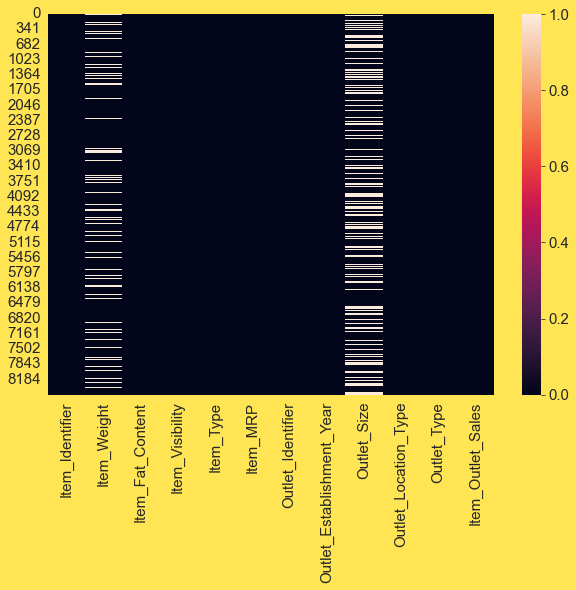

In [17]:
# heatmap to see the null values
sns.heatmap(sales_train.isnull())

In [18]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
# We can see there are null values in Item weight and outlet size in both train and test datsets

In [20]:
null_cont = sales_train[sales_train['Item_Weight'].isnull()]
null_cont

# The data is missing completely at random

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [21]:
null_cont.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [22]:
null_cont.Outlet_Size.unique()

array(['Medium', 'Small'], dtype=object)

In [23]:
sales_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [24]:
# before treating the null values lets plot to see how item_size is distributed,it is a continuous variable
#sns.distplot(sales_train['Item_Weight'])

# we can see that itemsize is almost normally distributed

In [25]:
# replacing the missing values of Item_weight with its mean.
# sales_train['Item_Weight'].fillna(sales_train['Item_Weight'].median(),inplace=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

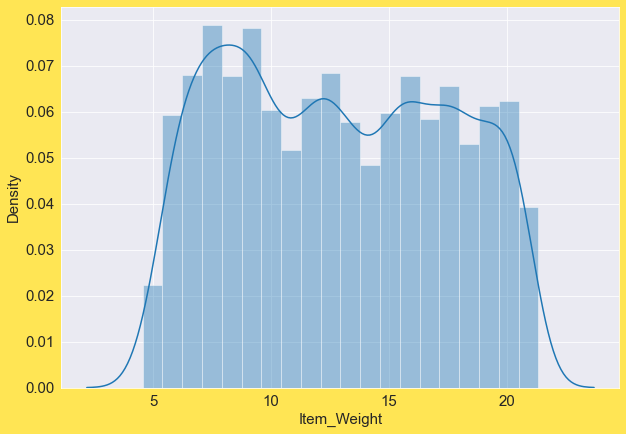

In [26]:
# checking the distribution again
sns.distplot(sales_train['Item_Weight'])

In [27]:
sales_train['Item_Weight'].isnull().sum()

1463

In [28]:
# using random sample 
sales_train['Item_Weight'].dropna().sample(sales_train['Item_Weight'].isnull().sum(),random_state=0)

3184    15.75
3590    10.30
3496    14.85
1077    15.85
3696    20.00
        ...  
6921    11.80
4809     9.00
1103    16.10
990     13.50
4614    15.10
Name: Item_Weight, Length: 1463, dtype: float64

In [29]:
# We are imputing the null values with mean beacuse Item_Weight is normally distributed
# we are checking with the random sample imputaion as well beacuse there are more than 10% null data
# And with mean imp it will bring in unnecessary outliers,it changes the distribution and affexts the covariance with other columns as well
# writing a function to try imputing using median and random imputation methods
def impute_nan(sales_train,feature,mean):
    
    sales_train[feature+'mean'] = sales_train[feature].fillna(mean)
    sales_train[feature+'random'] = sales_train[feature]
    
    random_sample = sales_train[feature].dropna().sample(sales_train['Item_Weight'].isnull().sum(),random_state=0)
    # below here if want to merge the data the indexes have to be same so we are giving 
    random_sample.index = sales_train[sales_train[feature].isnull()].index
    
    sales_train.loc[sales_train[feature].isnull(),feature+'random'] = random_sample
    

In [30]:
mean = sales_train['Item_Weight'].mean()
mean

12.857645184136183

In [31]:
impute_nan(sales_train,'Item_Weight',mean)

In [32]:
sales_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Item_Weightmean  Item_Weightrandom  
0  Supermarket Type1          3735.1380             9.30               9.30  
1  Supermarket Type2           443.4228             5.92               5.92  
2  Supermarket Type1          2097.2700            17.50              17.50  
3      Grocery Store           732.3800            19.20              19.20  
4  Supermarket Type1           994.7052             8.93               8.93

<AxesSubplot:title={'center':'Distribution before and after mean imputation'}, ylabel='Density'>

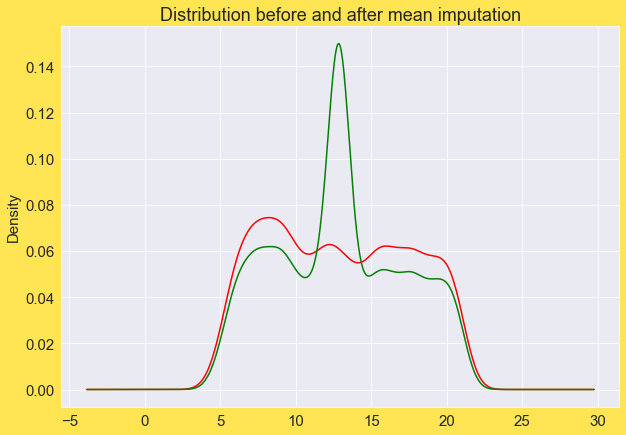

In [33]:
# Checking the distribution to make sure it is fitting properly
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribution before and after mean imputation')

sales_train['Item_Weight'].plot(kind='kde',ax=ax,color='red')
sales_train['Item_Weightmean'].plot(kind='kde',ax=ax,color='green')

# We can see that its distribution is changing when we apply mean imputation


<AxesSubplot:title={'center':'Distribution before and after mean imputation'}, ylabel='Density'>

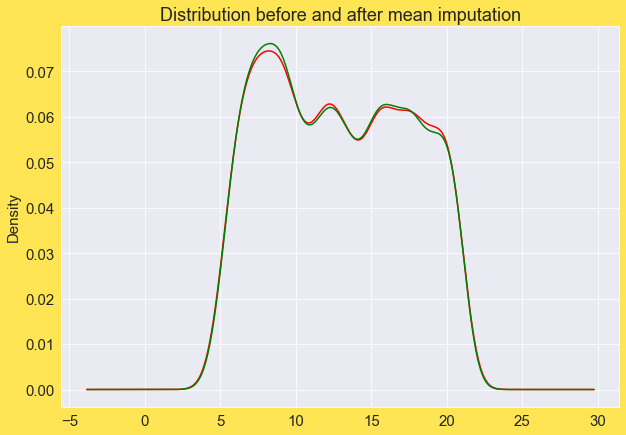

In [34]:
# checking the same for random imputation method
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribution before and after mean imputation')

sales_train['Item_Weight'].plot(kind='kde',ax=ax,color='red')
sales_train['Item_Weightrandom'].plot(kind='kde',ax=ax,color='green')

# We can see that the distributionn is overlapping that means we have not changed the data completely by doing imputation


In [35]:
# Checking the covariance after imputimng the null values with mean and random
sales_train.cov().T
# We can observe that covariance  hasn't changed much with both the mean imputation and random sample imputation
# But random sample imputation is preserving the distribution with the original Item_Weight column

Item_Weight  Item_Visibility      Item_MRP  \
Item_Weight                  21.561688        -0.003172      7.865693   
Item_Visibility              -0.003172         0.002662     -0.004225   
Item_MRP                      7.865693        -0.004225   3878.183909   
Outlet_Establishment_Year    -0.354551        -0.032325      2.617143   
Item_Outlet_Sales           100.560811       -11.325611  60317.485612   
Item_Weightmean              21.561688        -0.002627      6.515364   
Item_Weightrandom            21.561688        -0.003590      6.288100   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.354551       1.005608e+02   
Item_Visibility                            -0.032325      -1.132561e+01   
Item_MRP                                    2.617143       6.031749e+04   
Outlet_Establishment_Year                  70.086372      -7.019621e+02   
Item_Outlet_Sales                        -701.962133       2.912141e+06   
Item_Weightmean                            -0.293684       8.329720e+01   
Item_Weightrandom                          -0.032191       4.103008e+01   

                           Item_Weightmean  Item_Weightrandom  
Item_Weight                      21.561688          21.561688  
Item_Visibility                  -0.002627          -0.003590  
Item_MRP                          6.515364           6.288100  
Outlet_Establishment_Year        -0.293684          -0.032191  
Item_Outlet_Sales                83.297203          41.030082  
Item_Weightmean                  17.860122          17.860122  
Item_Weightrandom                17.860122          21.473295

In [36]:
# dropping Item_Weightmean and Item_Weight
sales_train.drop(['Item_Weight','Item_Weightmean'],axis=1,inplace=True)

In [37]:
sales_train.head(3)

Item_Identifier Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0           FDA15          Low Fat         0.016047        Dairy  249.8092   
1           DRC01          Regular         0.019278  Soft Drinks   48.2692   
2           FDN15          Low Fat         0.016760         Meat  141.6180   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   
1            OUT018                       2009      Medium   
2            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1          3735.1380   
1               Tier 3  Supermarket Type2           443.4228   
2               Tier 1  Supermarket Type1          2097.2700   

   Item_Weightrandom  
0               9.30  
1               5.92  
2              17.50

In [38]:
# Doing the same with train datset
sales_test.isnull().mean()*100

# we can see same amount of data is missing in the test dataset as well

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [39]:
# vreating a new feature for imputation
sales_test['Item_Weightrandom'] = sales_test['Item_Weight']

In [40]:
# imputing the Item_Weight from test data with random imputation technique
sales_test['Item_Weightrandom'][sales_test['Item_Weightrandom'].isnull()] = sales_test['Item_Weight'].dropna().sample(sales_test['Item_Weight'].isnull().sum()).values

<AxesSubplot:title={'center':'Distribution before and after mean imputation'}, ylabel='Density'>

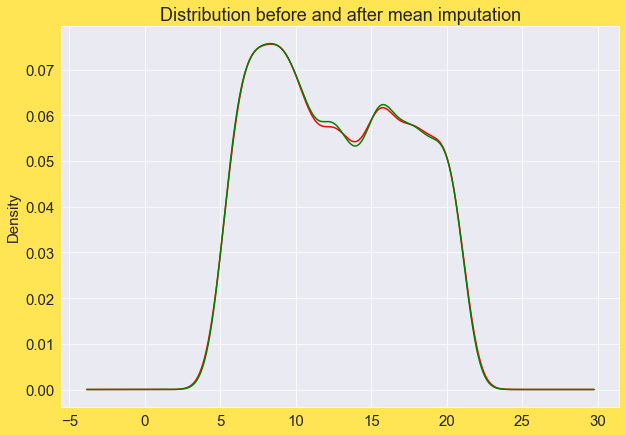

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribution before and after mean imputation')

sales_test['Item_Weight'].plot(kind='kde',ax=ax,color='red')
sales_test['Item_Weightrandom'].plot(kind='kde',ax=ax,color='green')


In [42]:
sales_test.cov()
# We can see that covariance is not changing in the test data as well

Item_Weight  Item_Visibility     Item_MRP  \
Item_Weight                  21.760812        -0.004303    14.338892   
Item_Visibility              -0.004303         0.002627    -0.044391   
Item_MRP                     14.338892        -0.044391  3820.363680   
Outlet_Establishment_Year     0.581425        -0.041640    -3.742832   
Item_Weightrandom            21.760812        -0.004729    11.436266   

                           Outlet_Establishment_Year  Item_Weightrandom  
Item_Weight                                 0.581425          21.760812  
Item_Visibility                            -0.041640          -0.004729  
Item_MRP                                   -3.742832          11.436266  
Outlet_Establishment_Year                  70.094664           0.647827  
Item_Weightrandom                           0.647827          21.670337

In [43]:
# dropping the Item_Weight column 
sales_test.drop(['Item_Weight'],axis=1,inplace=True)

In [44]:
sales_test.head(3)

Item_Identifier Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0           FDW58          Low Fat         0.007565  Snack Foods  107.8622   
1           FDW14              reg         0.038428        Dairy   87.3198   
2           NCN55          Low Fat         0.099575       Others  241.7538   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   
1            OUT017                       2007         NaN   
2            OUT010                       1998         NaN   

  Outlet_Location_Type        Outlet_Type  Item_Weightrandom  
0               Tier 1  Supermarket Type1              20.75  
1               Tier 2  Supermarket Type1               8.30  
2               Tier 3      Grocery Store              14.60

In [45]:
# NOW LETS TREAT THE MISSING VALUES IN CATEGORICAL FEATURE Outlet_Size in both train and test dataset

In [46]:
sales_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [47]:
sales_train.Outlet_Size.value_counts()

# we can see that Outlet_size mode is Medium

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [48]:
# creating the instance for null values in the categorical variable
null_cat = sales_train[sales_train['Outlet_Size'].isnull()]
null_cat

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
3              FDX07          Regular         0.000000  Fruits and Vegetables   
8              FDH17          Regular         0.016687           Frozen Foods   
9              FDU28          Regular         0.094450           Frozen Foods   
25             NCD06          Low Fat         0.099887              Household   
28             FDE51          Regular         0.161467                  Dairy   
...              ...              ...              ...                    ...   
8502           NCH43          Low Fat         0.070712              Household   
8508           FDW31          Regular         0.043246  Fruits and Vegetables   
8509           FDG45          Low Fat         0.214306  Fruits and Vegetables   
8514           FDA01          Regular         0.054489                 Canned   
8519           FDS36          Regular         0.046982           Baking Goods   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
3     182.0950            OUT010                       1998         NaN   
8      96.9726            OUT045                       2002         NaN   
9     187.8214            OUT017                       2007         NaN   
25     45.9060            OUT017                       2007         NaN   
28     45.5086            OUT010                       1998         NaN   
...        ...               ...                        ...         ...   
8502  216.4192            OUT045                       2002         NaN   
8508  199.4742            OUT045                       2002         NaN   
8509  213.9902            OUT010                       1998         NaN   
8514   57.5904            OUT045                       2002         NaN   
8519  108.1570            OUT045                       2002         NaN   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
3                  Tier 3      Grocery Store           732.3800   
8                  Tier 2  Supermarket Type1          1076.5986   
9                  Tier 2  Supermarket Type1          4710.5350   
25                 Tier 2  Supermarket Type1           838.9080   
28                 Tier 3      Grocery Store           178.4344   
...                   ...                ...                ...   
8502               Tier 2  Supermarket Type1          3020.0688   
8508               Tier 2  Supermarket Type1          2587.9646   
8509               Tier 3      Grocery Store           424.7804   
8514               Tier 2  Supermarket Type1           468.7232   
8519               Tier 2  Supermarket Type1           549.2850   

      Item_Weightrandom  
3                19.200  
8                16.200  
9                19.200  
25               13.000  
28                5.925  
...                 ...  
8502              8.420  
8508             11.350  
8509              8.100  
8514             15.000  
8519              8.380  

[2410 rows x 12 columns]

In [49]:
null_cat.head(20)

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
3            FDX07          Regular         0.000000  Fruits and Vegetables   
8            FDH17          Regular         0.016687           Frozen Foods   
9            FDU28          Regular         0.094450           Frozen Foods   
25           NCD06          Low Fat         0.099887              Household   
28           FDE51          Regular         0.161467                  Dairy   
30           FDV38          Low Fat         0.170349                  Dairy   
33           FDO23          Low Fat         0.000000                 Breads   
45           FDM39               LF         0.089499                  Dairy   
46           NCP05          Low Fat         0.000000     Health and Hygiene   
47           FDV49          Low Fat         0.025880                 Canned   
53           FDA43          Low Fat         0.065042  Fruits and Vegetables   
54           NCP18          Low Fat         0.028760              Household   
56           NCX54          Low Fat         0.048157              Household   
61           FDV27          Regular         0.040071                   Meat   
65           FDC46               LF         0.195068            Snack Foods   
67           FDZ03          Regular         0.078946                  Dairy   
68           DRH37          Low Fat         0.041701            Soft Drinks   
72           FDH35          Low Fat         0.000000          Starchy Foods   
73           FDG02          Low Fat         0.011325                 Canned   
78           FDL04          Low Fat         0.112557           Frozen Foods   

    Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
3   182.0950            OUT010                       1998         NaN   
8    96.9726            OUT045                       2002         NaN   
9   187.8214            OUT017                       2007         NaN   
25   45.9060            OUT017                       2007         NaN   
28   45.5086            OUT010                       1998         NaN   
30   55.7956            OUT010                       1998         NaN   
33   93.1436            OUT045                       2002         NaN   
45  178.1002            OUT010                       1998         NaN   
46  153.3024            OUT045                       2002         NaN   
47  265.2226            OUT045                       2002         NaN   
53  196.3794            OUT017                       2007         NaN   
54  151.4708            OUT017                       2007         NaN   
56  106.1622            OUT045                       2002         NaN   
61   87.3514            OUT045                       2002         NaN   
65  185.4266            OUT010                       1998         NaN   
67  186.0240            OUT045                       2002         NaN   
68  164.8526            OUT045                       2002         NaN   
72  164.7526            OUT045                       2002         NaN   
73  189.6188            OUT017                       2007         NaN   
78  104.9622            OUT017                       2007         NaN   

   Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
3                Tier 3      Grocery Store           732.3800   
8                Tier 2  Supermarket Type1          1076.5986   
9                Tier 2  Supermarket Type1          4710.5350   
25               Tier 2  Supermarket Type1           838.9080   
28               Tier 3      Grocery Store           178.4344   
30               Tier 3      Grocery Store           163.7868   
33               Tier 2  Supermarket Type1          2174.5028   
45               Tier 3      Grocery Store           358.2004   
46               Tier 2  Supermarket Type1          2428.8384   
47               Tier 2  Supermarket Type1          5815.0972   
53               Tier 2  Supermarket Type1          3121.2704   
54               Tier 2  Supe

In [50]:
null_cat.Outlet_Location_Type.value_counts()

# All the missing values Outlet_Size values are for tier 2 and tier 3 locations

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [51]:
sales_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [52]:
null_cat.Outlet_Type.value_counts()
# we can see that there are missing Outlet_Size values only for  Supermarket Type1 and Grocery Store

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [53]:
sales_train.Outlet_Identifier.value_counts() # original unique values

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [54]:
null_cat.Outlet_Identifier.value_counts()

# we can see the missing data is only from these three Outlet identifiers

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [55]:
# % of null values is more than 25%, using mode impuattion it will completely change the distribution of the feature, cause covariance changes with other features and bring in unnecessary outliers
# so we will check random sample imputation method

In [56]:
# we are creating a feature as outlet random to impute our categorical data into random
# 
sales_train['Outlet_Sizerandom'] = sales_train['Outlet_Size']

In [57]:
sales_train.sample()
# we are making a new feature which is similar to outletsizewith nulll values

Item_Identifier Item_Fat_Content  Item_Visibility      Item_Type  \
4393           FDB23              reg         0.005584  Starchy Foods   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
4393  226.9062            OUT013                       1987        High   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
4393               Tier 3  Supermarket Type1           4514.124   

      Item_Weightrandom Outlet_Sizerandom  
4393               19.2              High

In [58]:
sales_train['Outlet_Sizerandom'][sales_train['Outlet_Sizerandom'].isnull()] = sales_train['Outlet_Size'].dropna().sample(sales_train['Outlet_Size'].isnull().sum()).values

In [59]:
sales_train.sample(3)

Item_Identifier Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
3561           FDY33          Regular         0.097751  Snack Foods  159.7262   
8088           FDY15          Regular         0.171524        Dairy  155.8630   
289            NCT54          Low Fat         0.119721    Household   95.5094   

     Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
3561            OUT017                       2007         NaN   
8088            OUT018                       2009      Medium   
289             OUT049                       1999      Medium   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
3561               Tier 2  Supermarket Type1          5728.5432   
8088               Tier 3  Supermarket Type2          2346.9450   
289                Tier 1  Supermarket Type1          1237.7222   

      Item_Weightrandom Outlet_Sizerandom  
3561             14.500            Medium  
8088             18.250            Medium  
289               8.695            Medium

In [60]:
# checking if there is any change in the frequency of the categorical variable after imputing

In [61]:
freq_check = pd.concat([sales_train['Outlet_Size'].value_counts()/len(sales_train['Outlet_Size'].dropna()),
                       sales_train['Outlet_Sizerandom'].value_counts()/len(sales_train)],axis=1)

freq_check.columns = ['Original','Random_Imputed']

In [62]:
freq_check

Original  Random_Imputed
Medium  0.456895        0.459228
Small   0.390643        0.387540
High    0.152462        0.153232

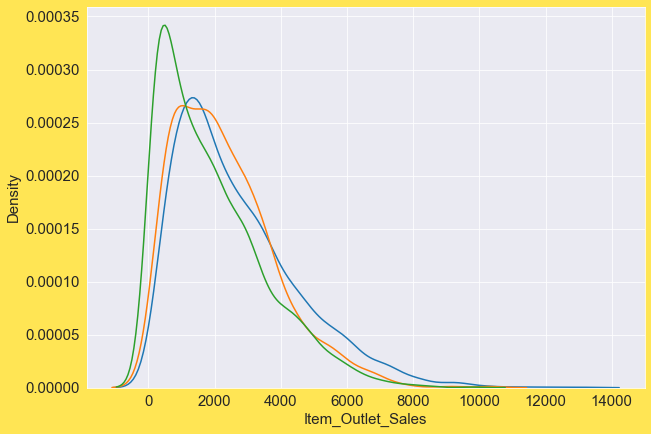

In [63]:
# Checking the distribution of Original Item_Size before  imputation with respect to the sales
# To check if the distribution is same or distorted
for cat in sales_train['Outlet_Size'].dropna().unique():
    sns.distplot(sales_train[sales_train['Outlet_Size'] == cat]['Item_Outlet_Sales'],hist=False,label=cat)
plt.show()


In [64]:
# Checking the same after imputation

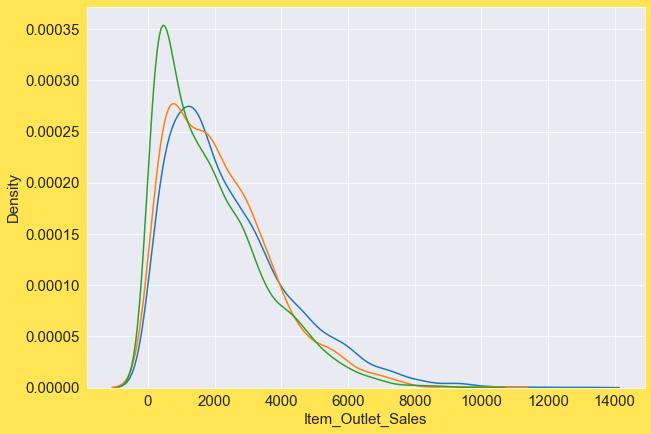

In [65]:
for cat in sales_train['Outlet_Sizerandom'].dropna().unique():
    sns.distplot(sales_train[sales_train['Outlet_Sizerandom'] == cat]['Item_Outlet_Sales'],hist=False,label=cat)
plt.show()

# We can see that the distribution hasn't changed drastically, so we will continue with the random samole imputation

In [66]:
sales_train.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0           FDA15          Low Fat         0.016047                  Dairy   
1           DRC01          Regular         0.019278            Soft Drinks   
2           FDN15          Low Fat         0.016760                   Meat   
3           FDX07          Regular         0.000000  Fruits and Vegetables   
4           NCD19          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1          3735.1380   
1               Tier 3  Supermarket Type2           443.4228   
2               Tier 1  Supermarket Type1          2097.2700   
3               Tier 3      Grocery Store           732.3800   
4               Tier 3  Supermarket Type1           994.7052   

   Item_Weightrandom Outlet_Sizerandom  
0               9.30            Medium  
1               5.92            Medium  
2              17.50            Medium  
3              19.20              High  
4               8.93              High

In [67]:
# dropping the Outlet_Size original
sales_train.drop(['Outlet_Size'],axis=1,inplace=True)

In [68]:
sales_train.isnull().sum()
# null values are removed from training data

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weightrandom            0
Outlet_Sizerandom            0
dtype: int64

In [69]:
# we will do similar thing with testing data
sales_test['Outlet_Sizerandom'] = sales_test['Outlet_Size']

In [70]:
sales_test['Outlet_Sizerandom'][sales_test['Outlet_Sizerandom'].isnull()] = sales_test['Outlet_Size'].dropna().sample(sales_test['Outlet_Size'].isnull().sum()).values

In [71]:
# dropping the Original OutletSize
sales_test.drop(['Outlet_Size'],axis=1,inplace=True)

In [72]:
sales_test.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weightrandom            0
Outlet_Sizerandom            0
dtype: int64

In [73]:
# SO FAR WE HAVE TREATED THE NULL VALUES FROM TRAIN AND TEST DATA

In [74]:
# Both in train and testdata
# We can see that categories in Item_Fat feature are not named properly, 
# for Low fat there are two additional catgories named low fat and LF which are same as Low Fat, so we will change the names 
# similarly for Regular there is another category reg whuch is indicates same Regukar, so we will change that as well
print(sales_train['Item_Fat_Content'].value_counts())
print('\n')
print(sales_test['Item_Fat_Content'].value_counts())


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [75]:
# for train data 
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
# for test data
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})


In [76]:
# Rechecking the unique values
print(sales_train['Item_Fat_Content'].value_counts())
print('\n')
print(sales_test['Item_Fat_Content'].value_counts())

# Now we can see the names are changed and now we have only two categories in Item_fat_content feature

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [77]:
# 
print(sales_train['Item_Identifier'].value_counts())
print('\n')
print(sales_test['Item_Identifier'].value_counts())

# We have more than 1500 categories of Item_Identifier in train and test data

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64


In [78]:
# for effective analysing and model building we will change the unique categories based on their first two letters, on both train and test data
sales_train['Item_Identifier'] = sales_train['Item_Identifier'].astype(str).str[:2]

sales_test['Item_Identifier'] = sales_test['Item_Identifier'].astype(str).str[:2]

In [79]:
# rechecking the unique values
print(sales_train['Item_Identifier'].value_counts())
print('\n')
print(sales_test['Item_Identifier'].value_counts())

# We can see that the unique item identifier categories in both train and test reduced to 3  

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64


FD    4076
NC    1087
DR     518
Name: Item_Identifier, dtype: int64


In [80]:
sales_train.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0              FD          Low Fat         0.016047                  Dairy   
1              DR          Regular         0.019278            Soft Drinks   
2              FD          Low Fat         0.016760                   Meat   
3              FD          Regular         0.000000  Fruits and Vegetables   
4              NC          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Location_Type  \
0  249.8092            OUT049                       1999               Tier 1   
1   48.2692            OUT018                       2009               Tier 3   
2  141.6180            OUT049                       1999               Tier 1   
3  182.0950            OUT010                       1998               Tier 3   
4   53.8614            OUT013                       1987               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Item_Weightrandom Outlet_Sizerandom  
0  Supermarket Type1          3735.1380               9.30            Medium  
1  Supermarket Type2           443.4228               5.92            Medium  
2  Supermarket Type1          2097.2700              17.50            Medium  
3      Grocery Store           732.3800              19.20              High  
4  Supermarket Type1           994.7052               8.93              High

#### Lets Analyse the Data

### Univariate Analysis

In [81]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Item_Weightrandom          8523 non-null   float64
 11  Outlet_Sizerandom          8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [82]:
cat_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Sizerandom']
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Sizerandom']

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64


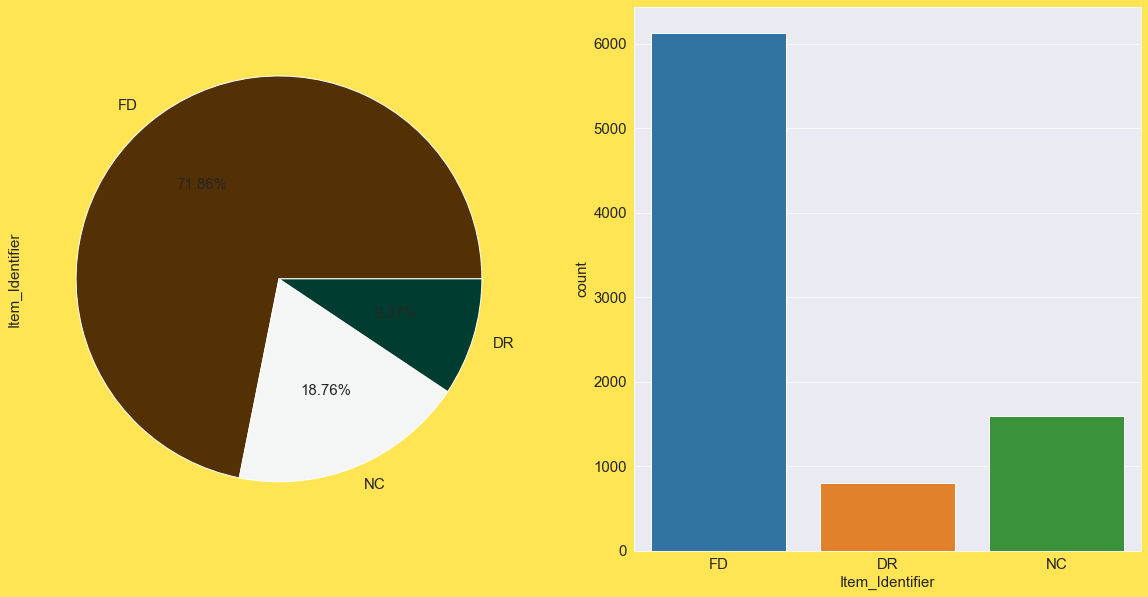

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


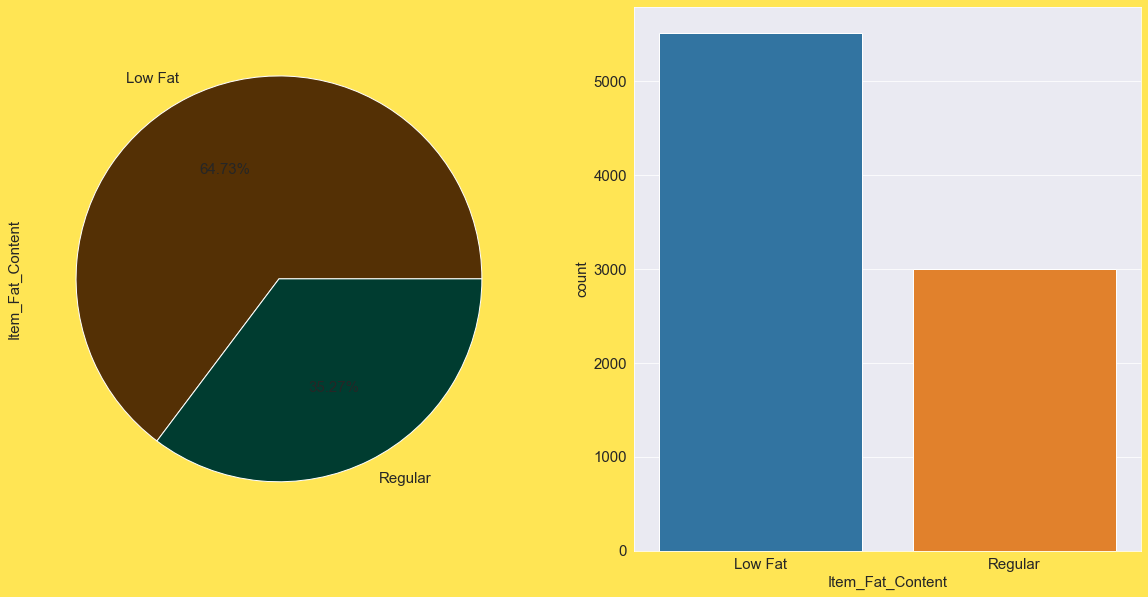

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


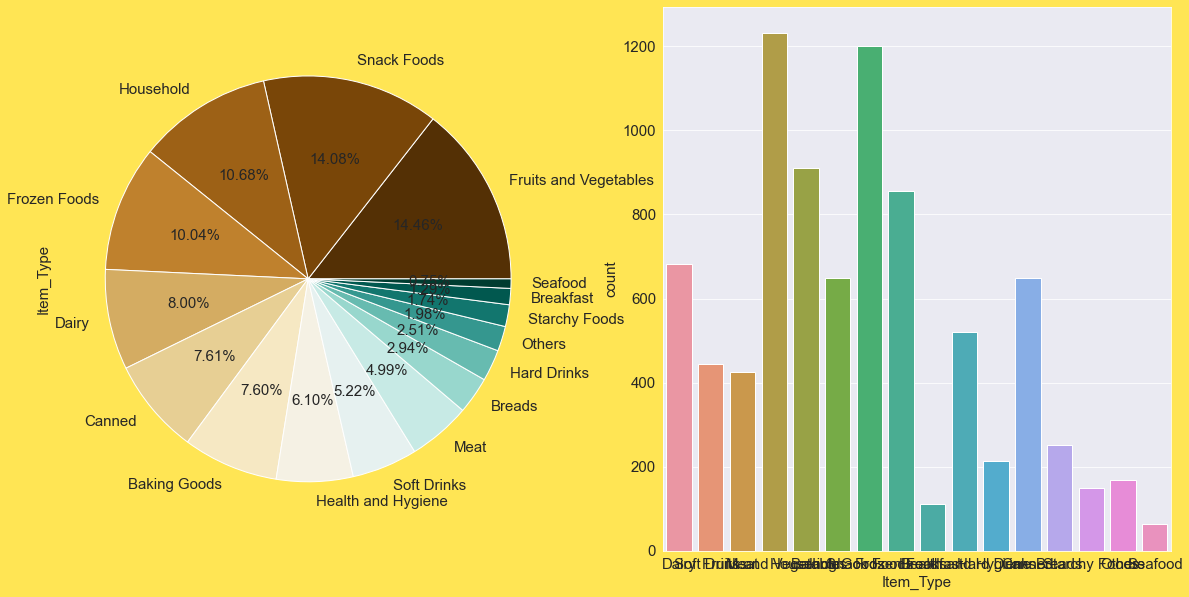

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


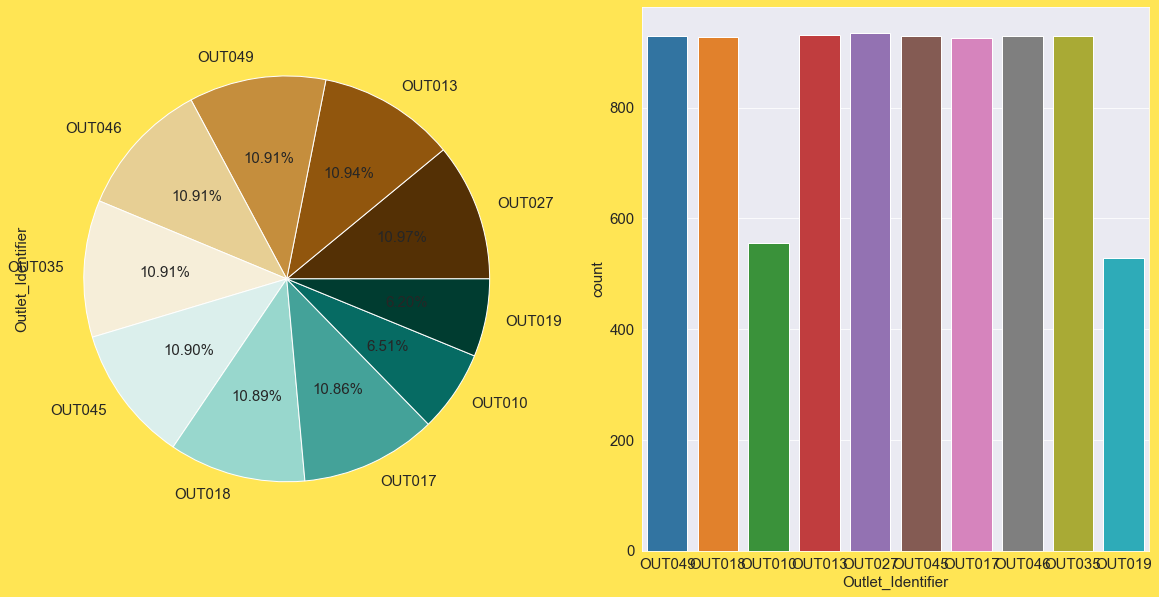

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


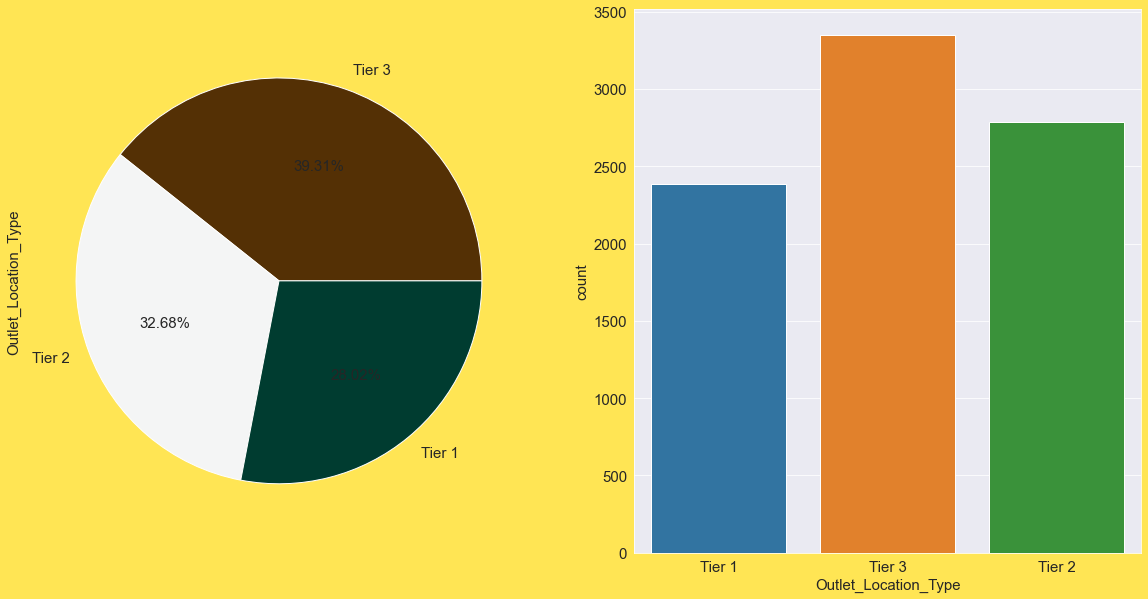

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


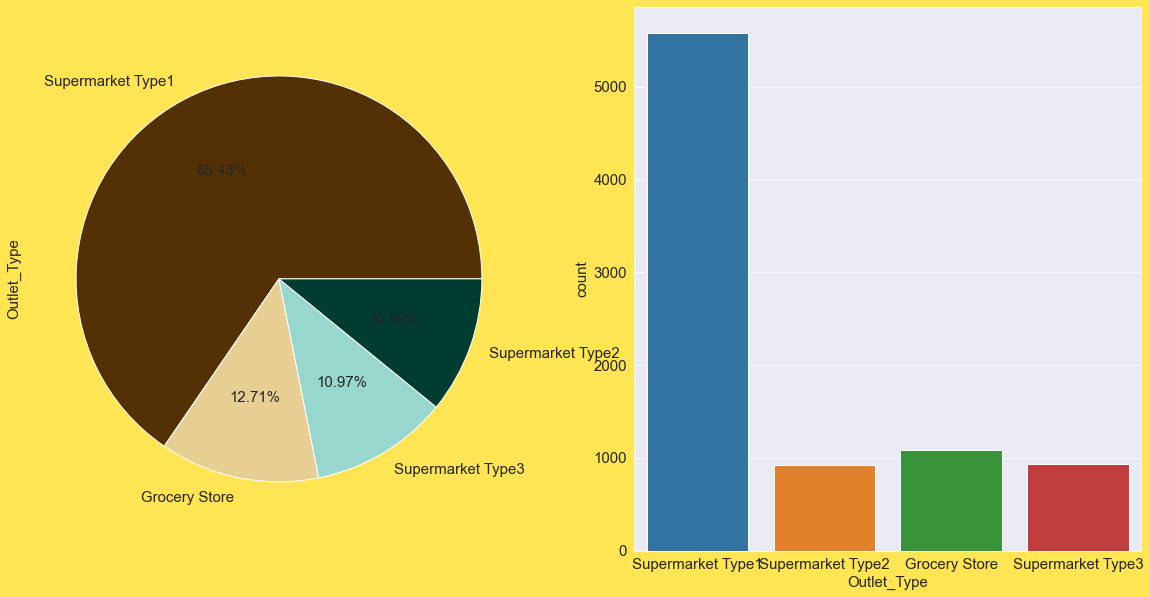

Medium    3914
Small     3303
High      1306
Name: Outlet_Sizerandom, dtype: int64


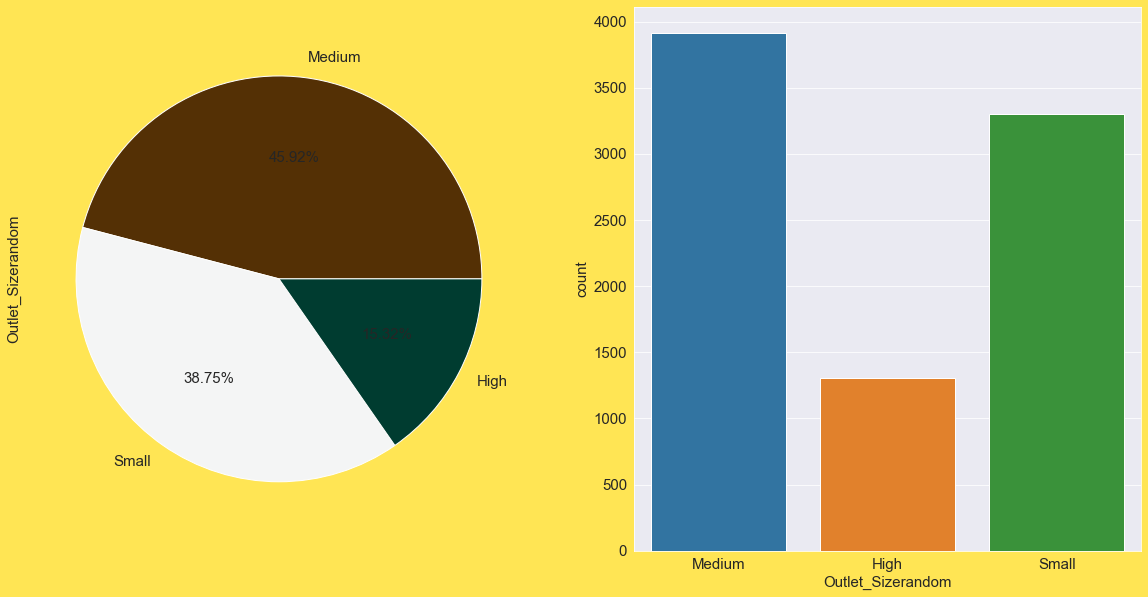

In [83]:
# We are plotting cat and pie plots to see the frequency of the data

for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(sales_train[i])
    plt.subplot(1,2,1)
    sales_train[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(sales_train[i].value_counts())
    plt.show()


## Observations from above plots

1. FD item identifier is high in frequency.


2. Low fat content items are more in the data than Regular.


3. Fruits and Vegetables,Snack Foodsand Frozen Foods are the two categories in which most of the items fall whereas Seafood and Breakfast is the least items.


4. There are total 10 outlets which are almost balanced, except for OUT019 and OUT010


5. Most of the outlets are medium in size.


6. Tier 3 cities have large number of stores.


7. Almost 65% are of Supermarket type 1 and 11% are of Type 2 , 11 % are of Type 3 ,13% are of Grocery Store.


8. Medium Size Outlets are more compared to high and small Outlets.


Bivariate Analysis

In [84]:
sales_train.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weightrandom            float64
Outlet_Sizerandom             object
dtype: object

In [85]:
cont_cols = sales_train[['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Weightrandom']]
cont_cols

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weightrandom
0            0.016047  249.8092                       1999              9.300
1            0.019278   48.2692                       2009              5.920
2            0.016760  141.6180                       1999             17.500
3            0.000000  182.0950                       1998             19.200
4            0.000000   53.8614                       1987              8.930
...               ...       ...                        ...                ...
8518         0.056783  214.5218                       1987              6.865
8519         0.046982  108.1570                       2002              8.380
8520         0.035186   85.1224                       2004             10.600
8521         0.145221  103.1332                       2009              7.210
8522         0.044878   75.4670                       1997             14.800

[8523 rows x 4 columns]

In [86]:
sales_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

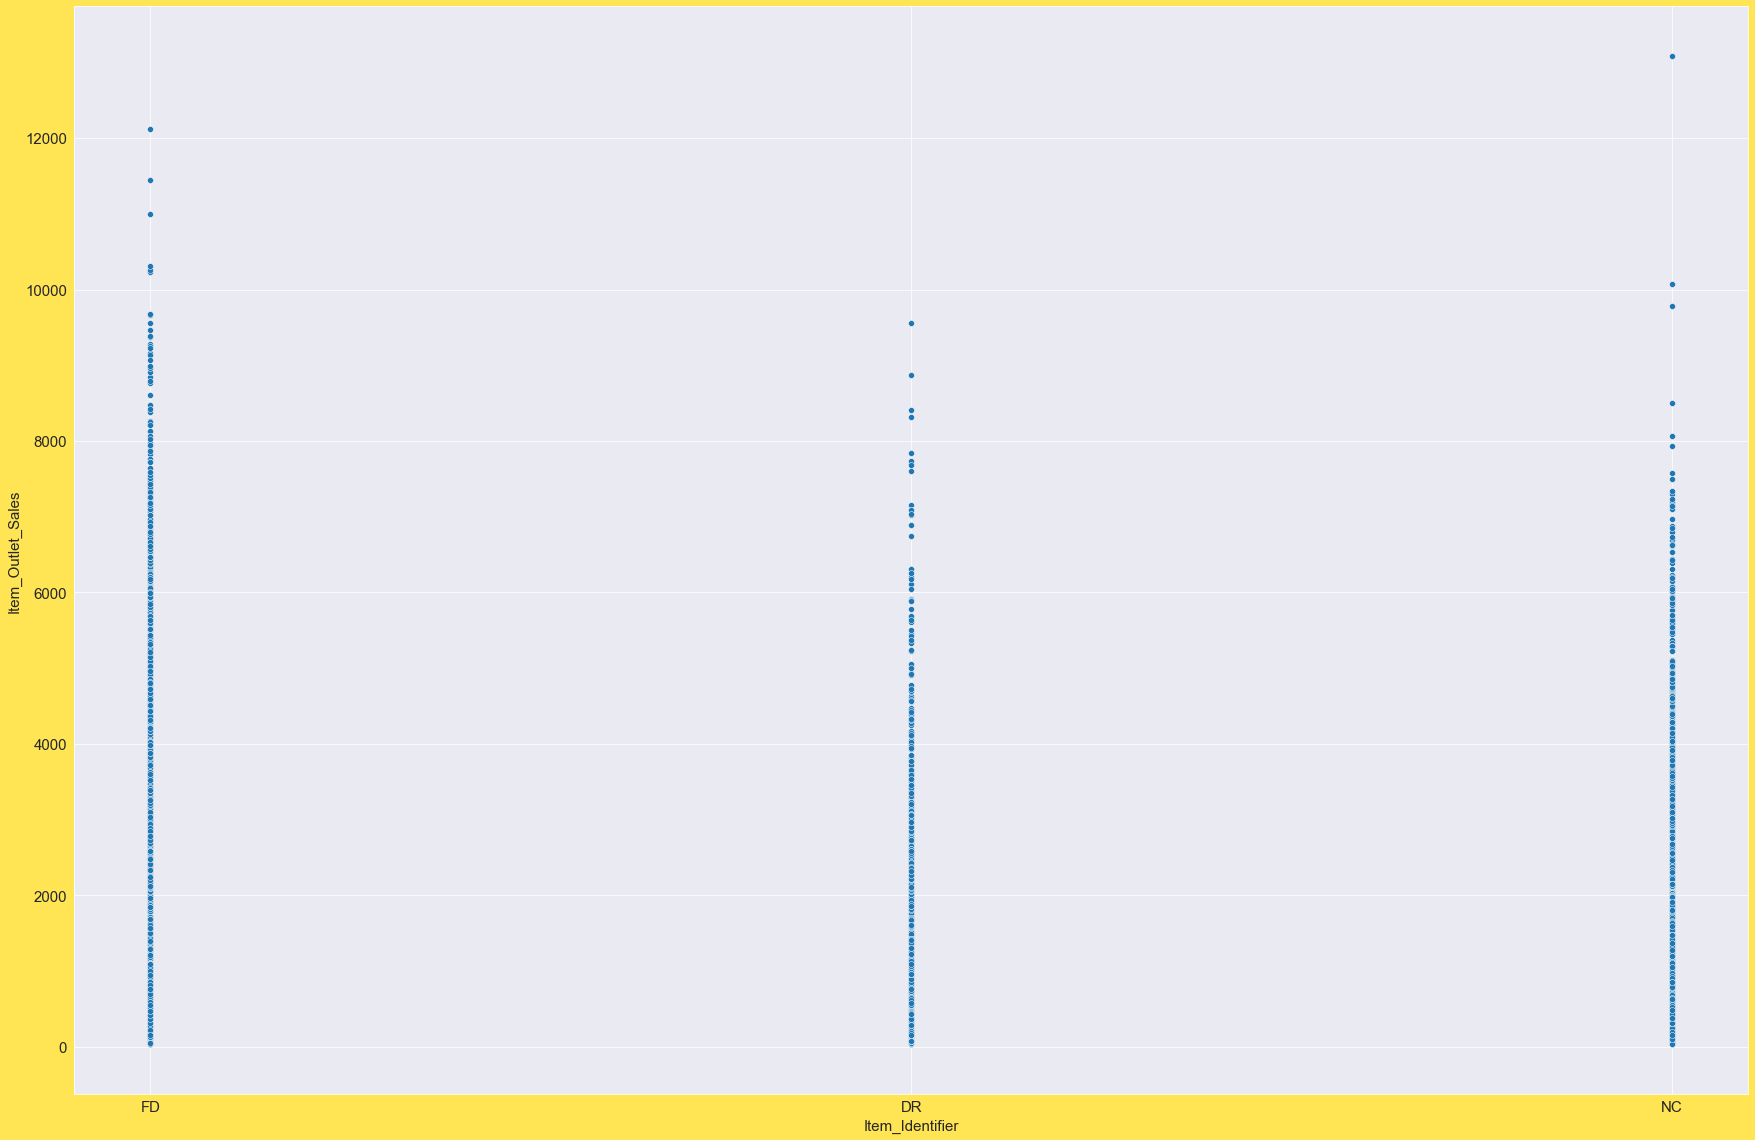

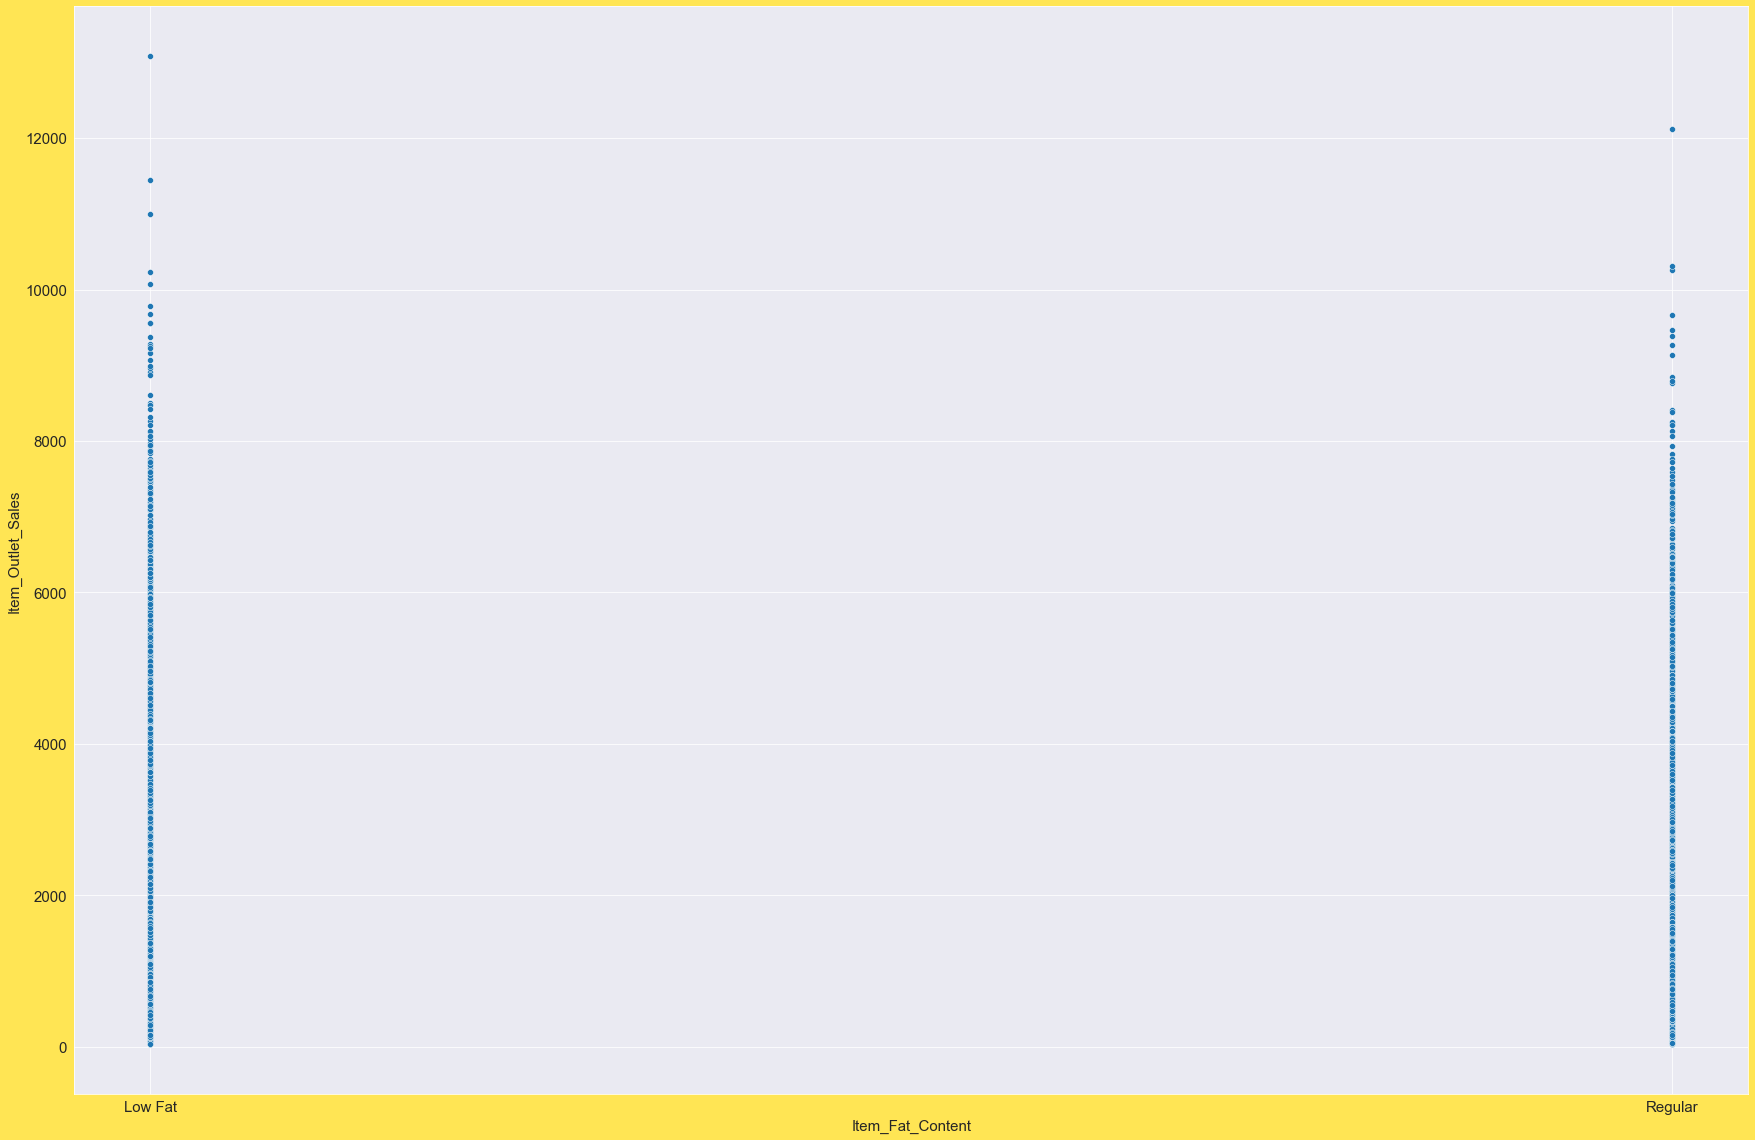

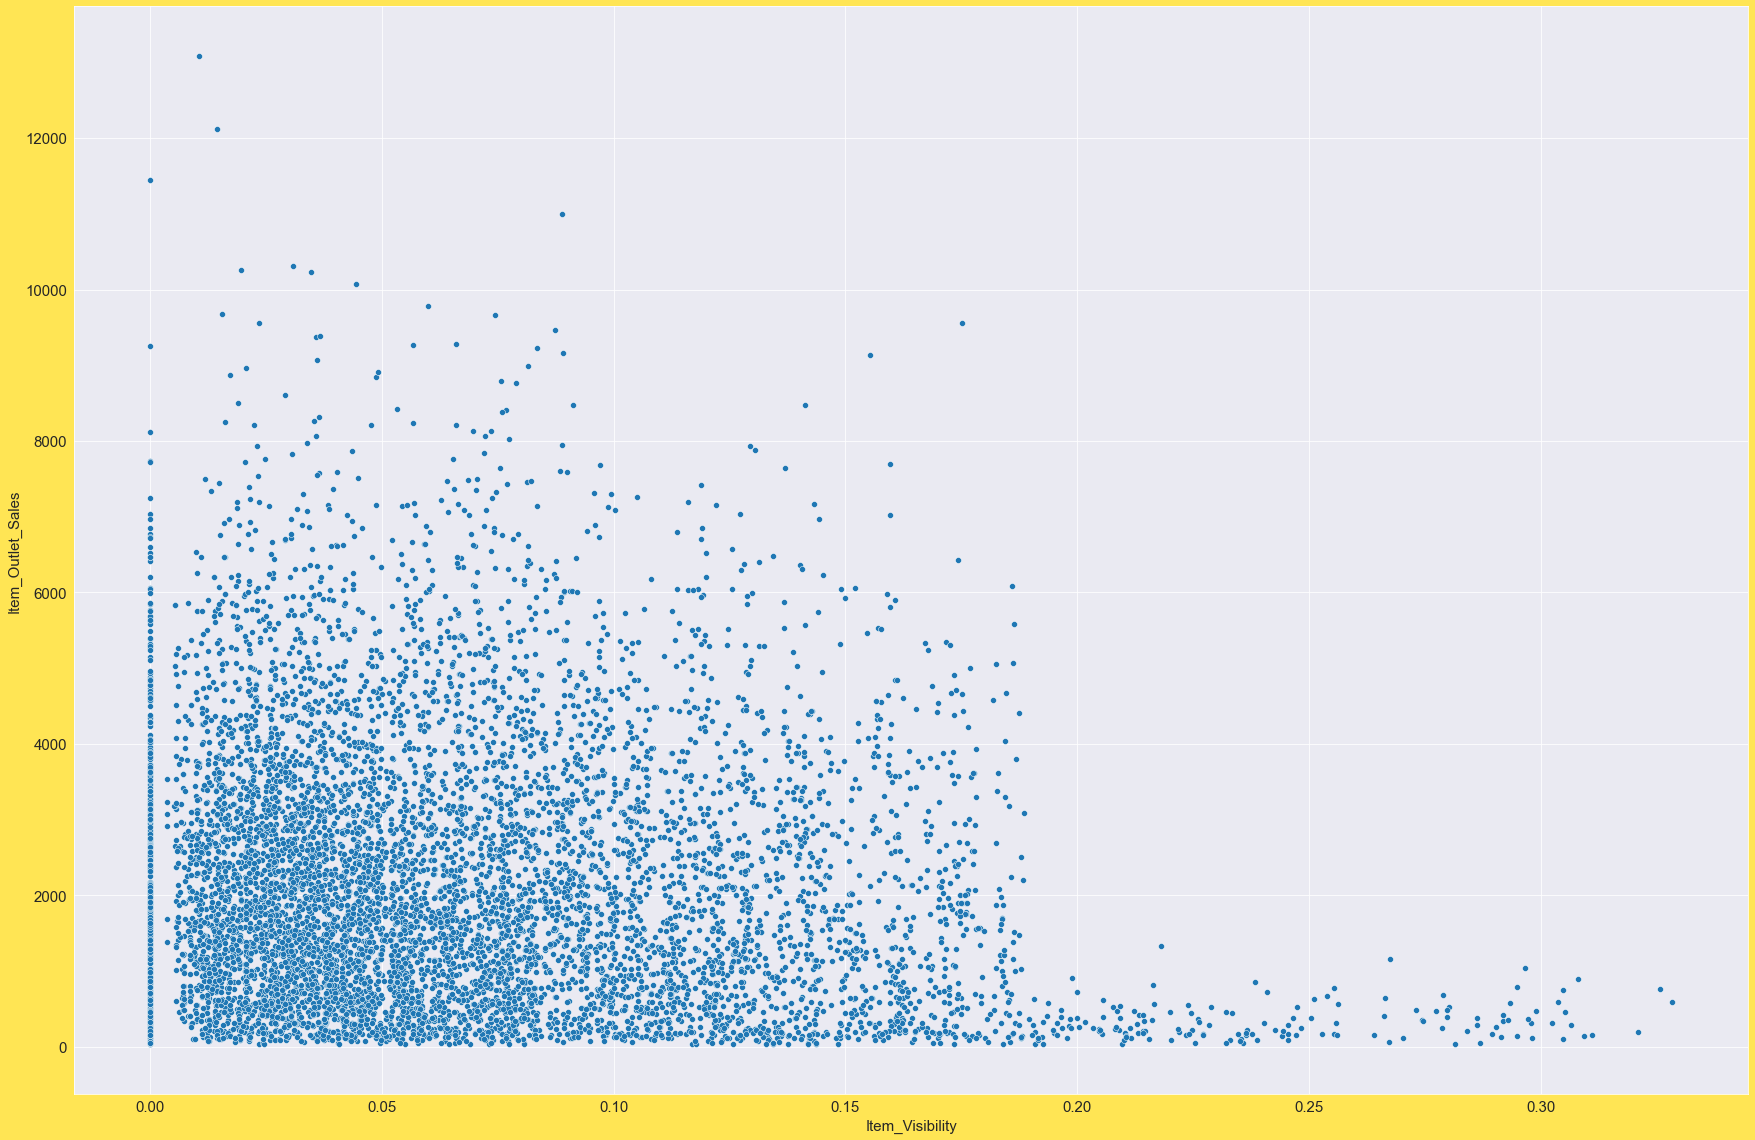

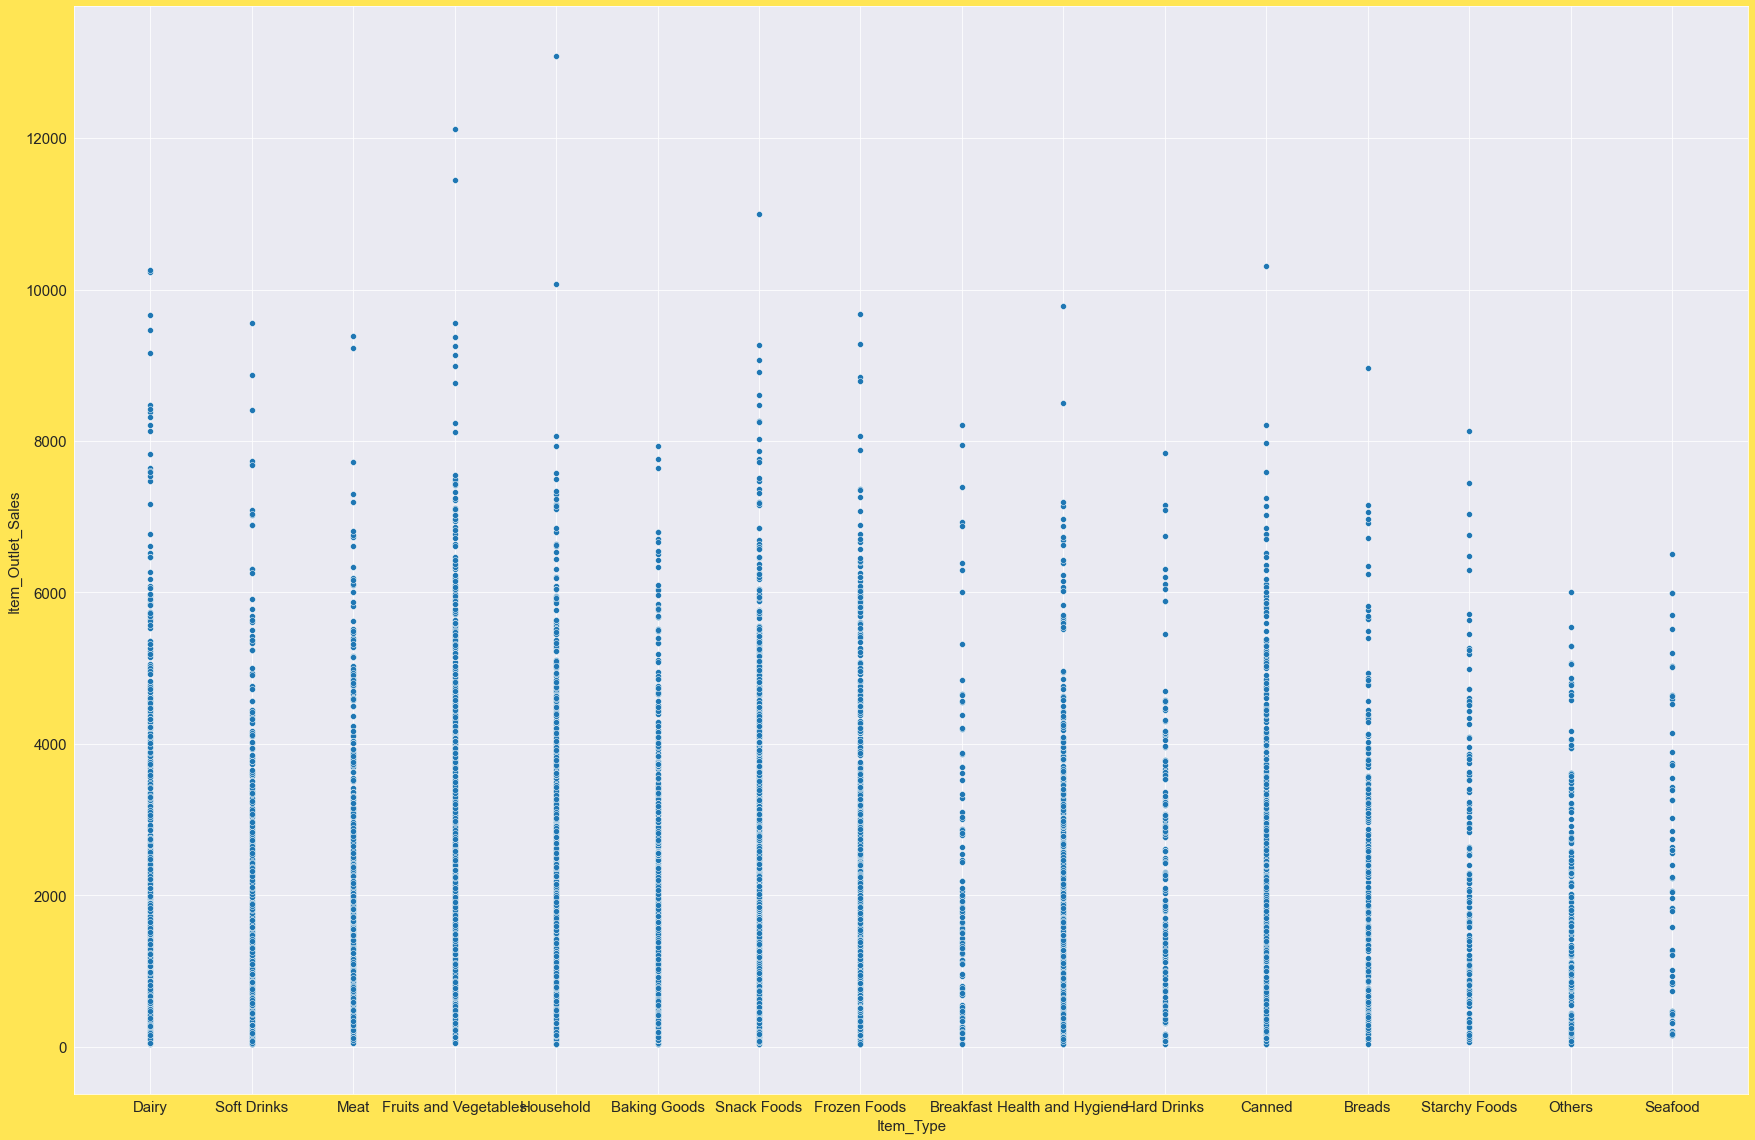

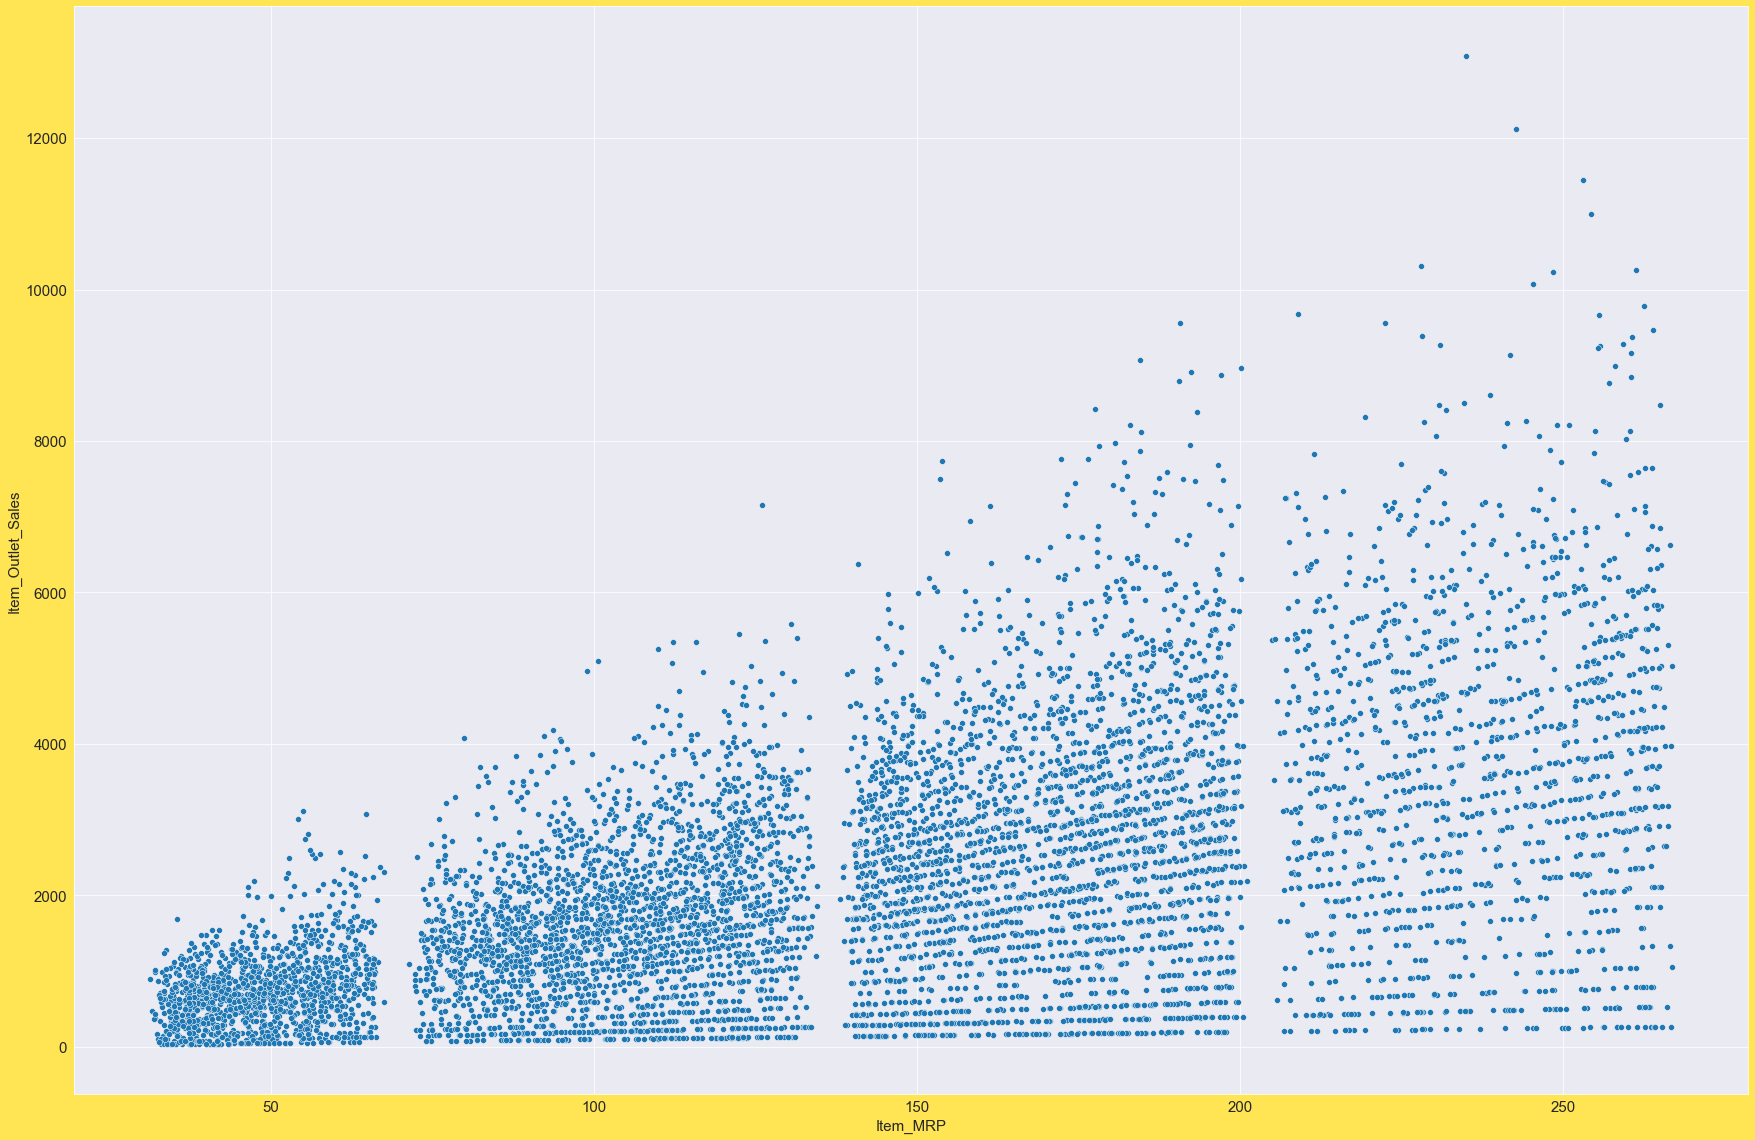

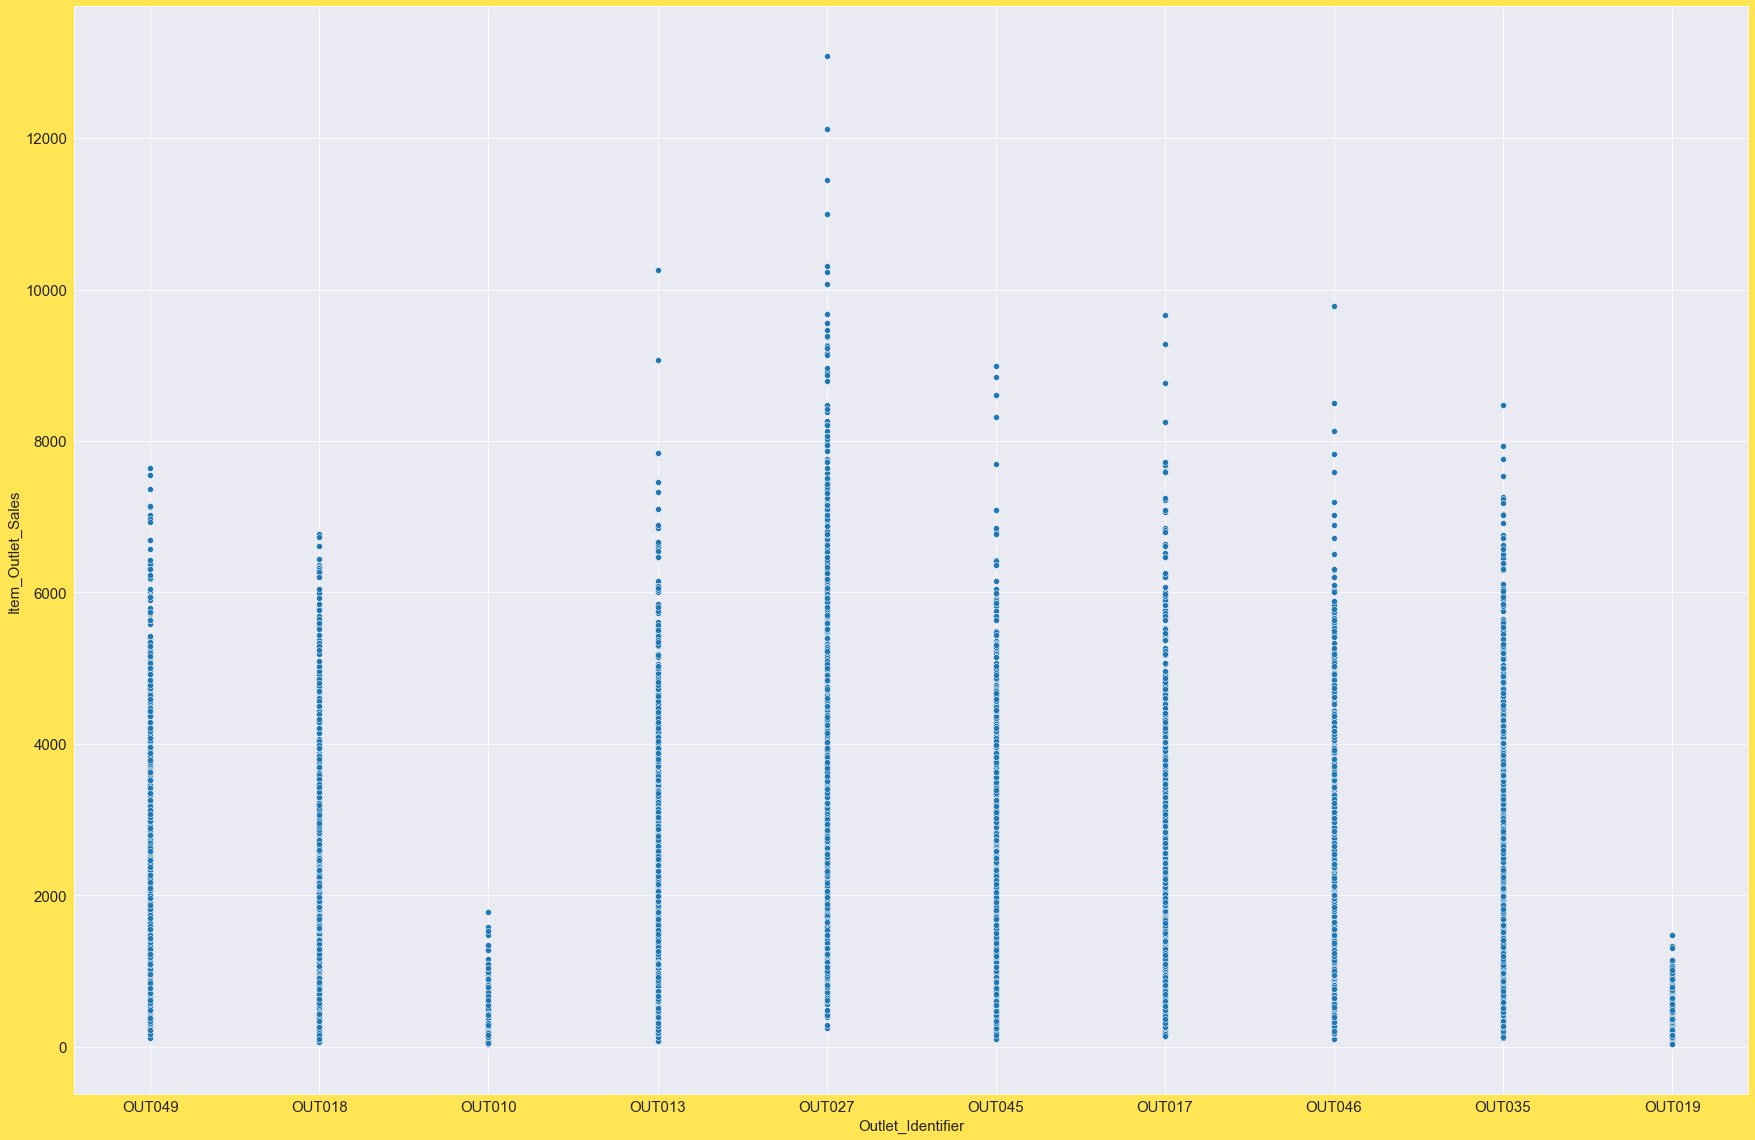

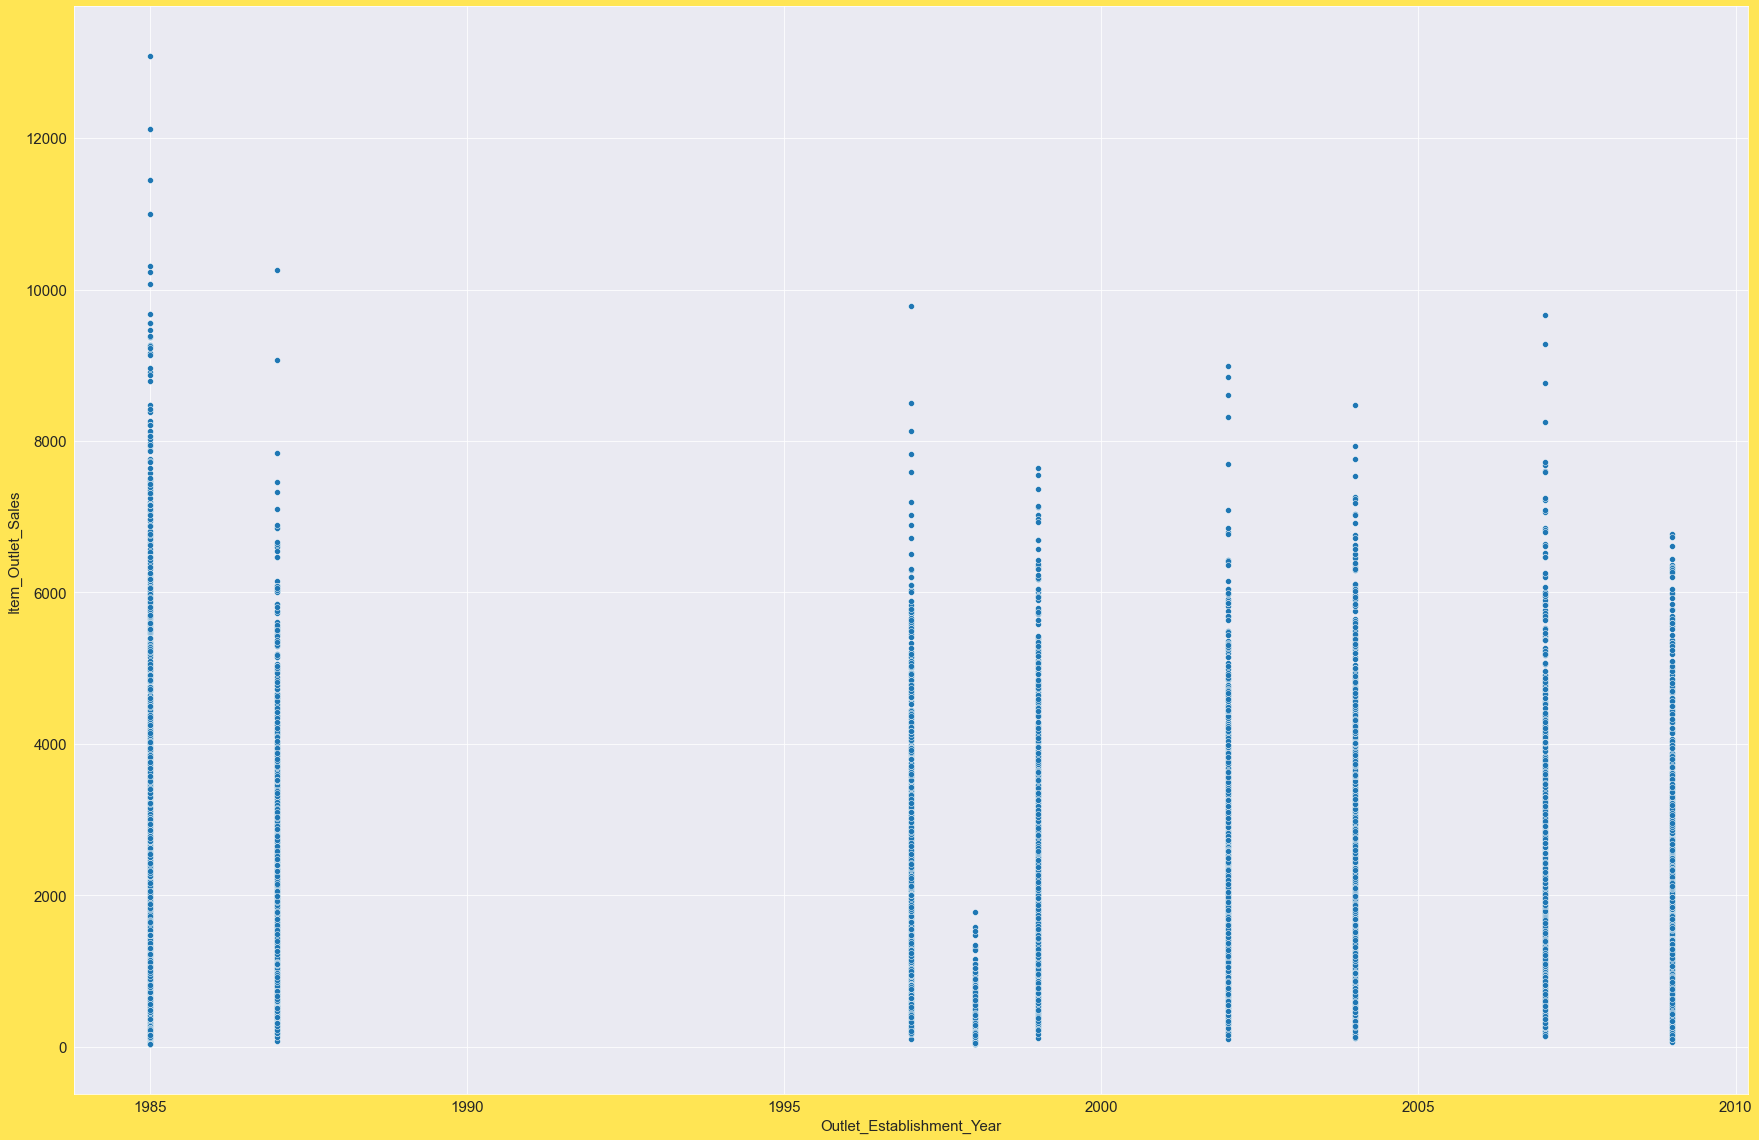

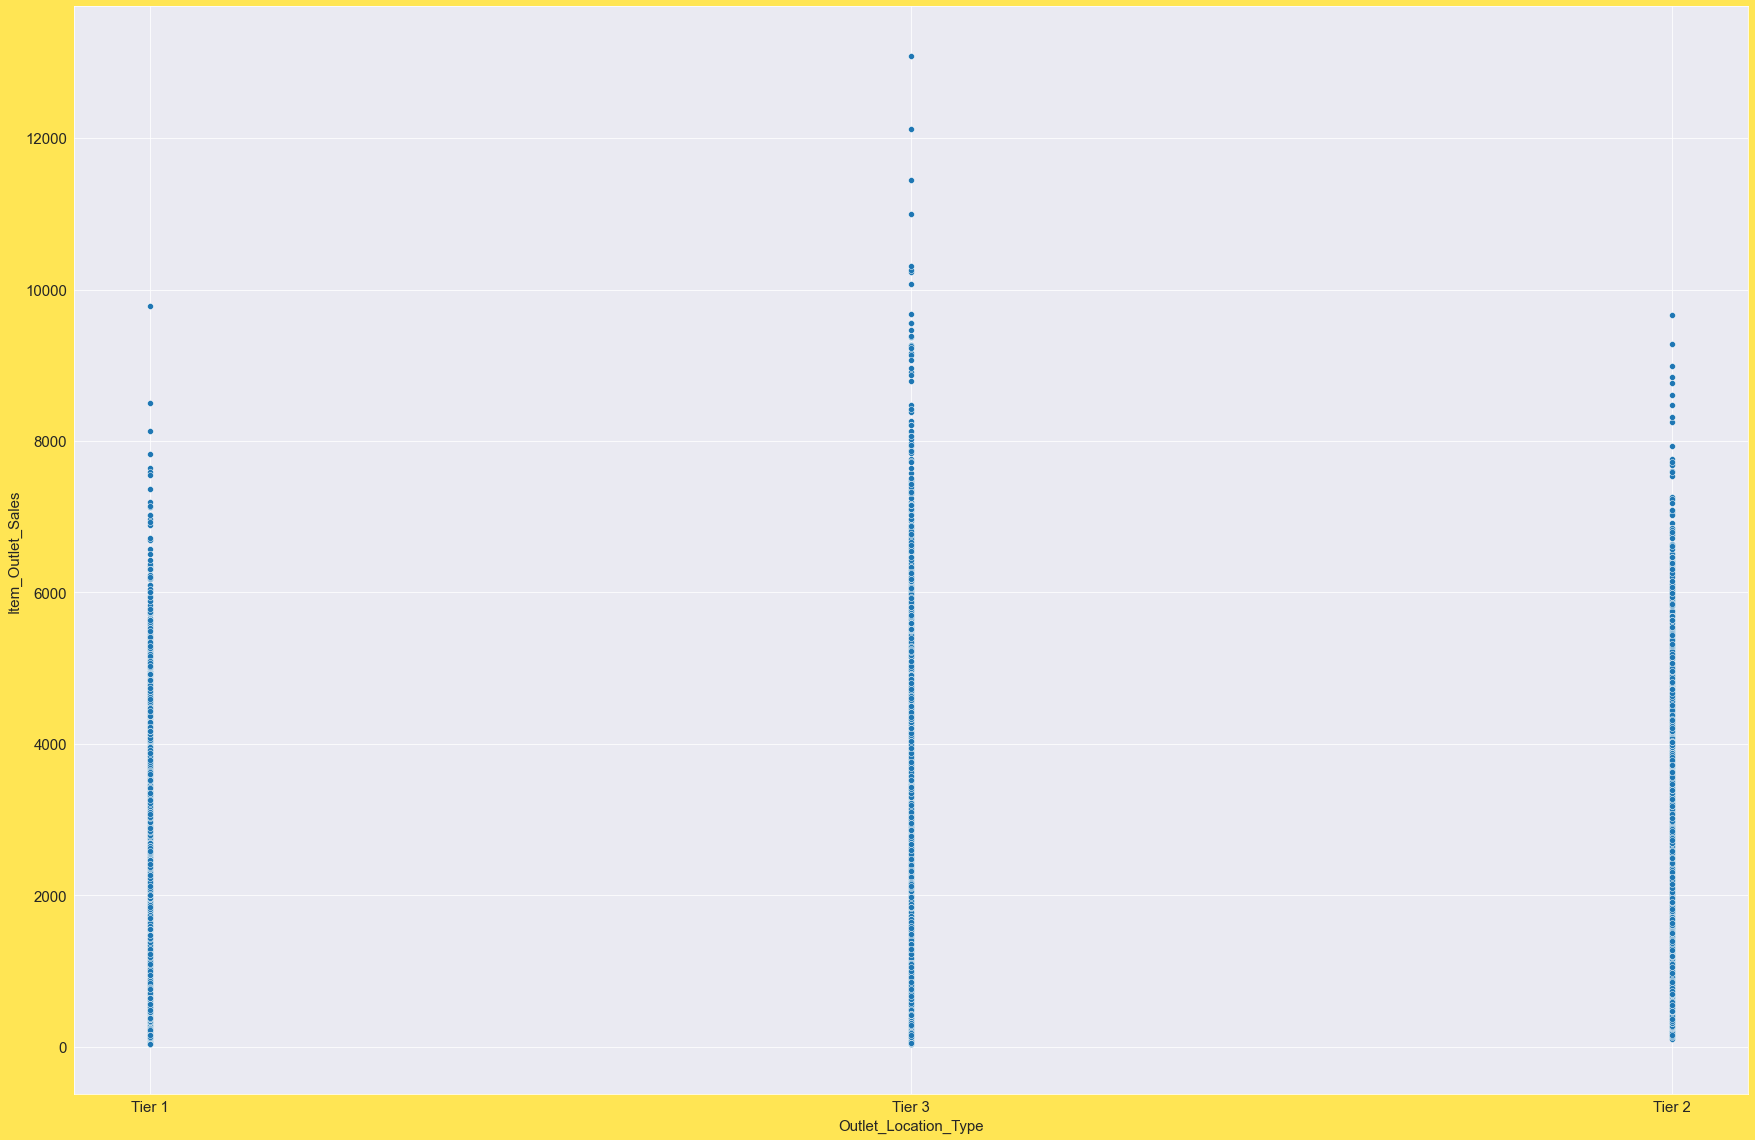

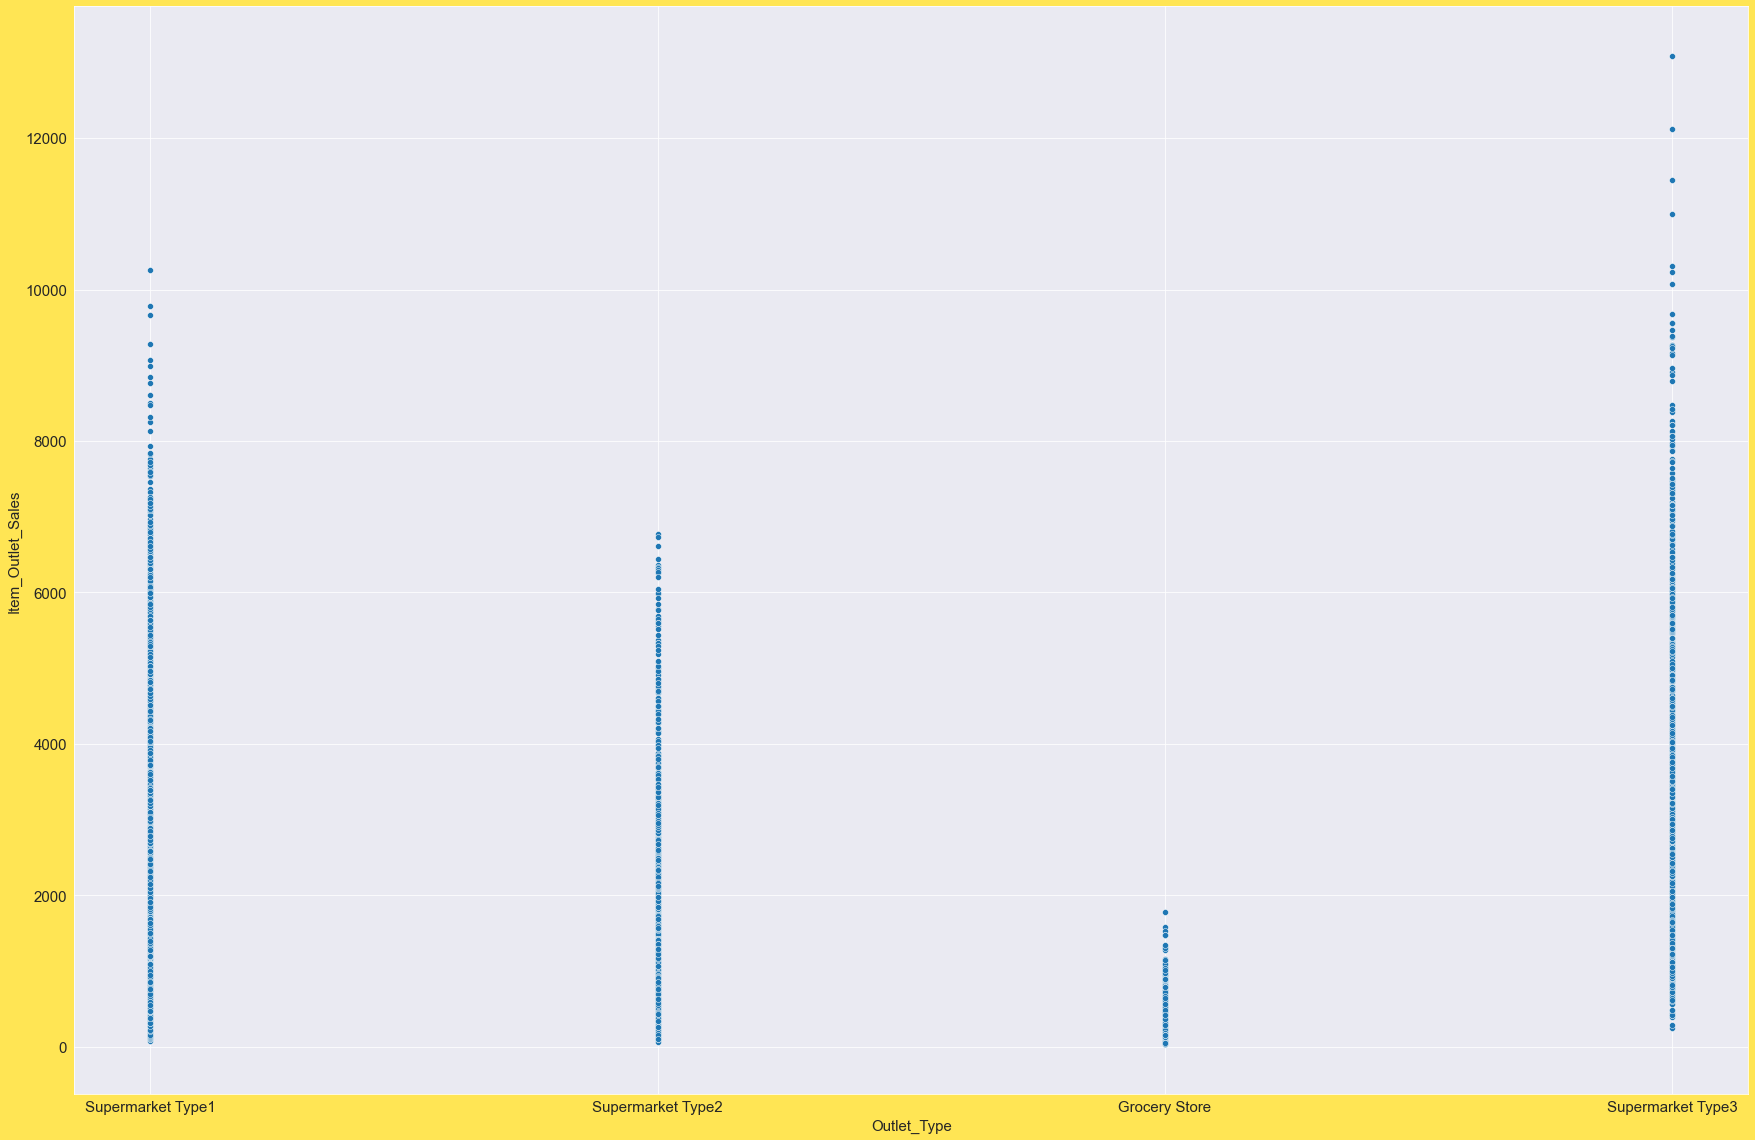

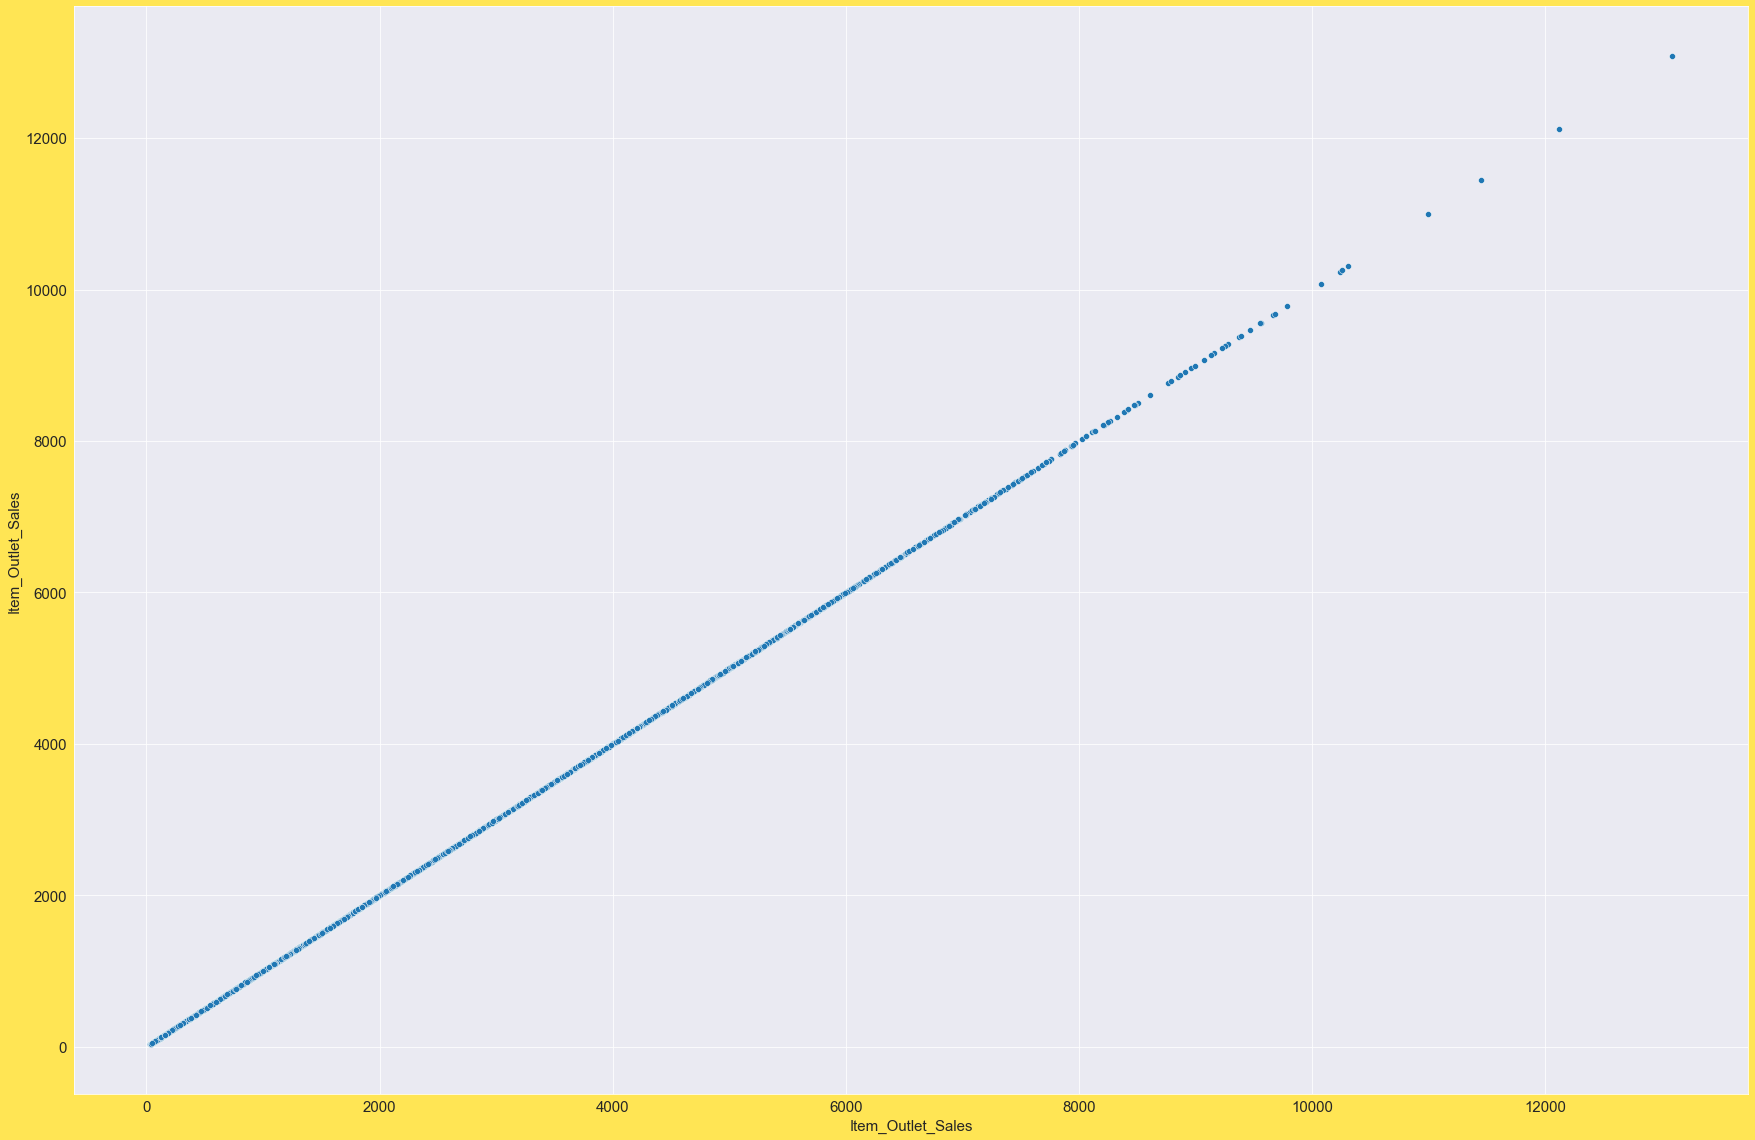

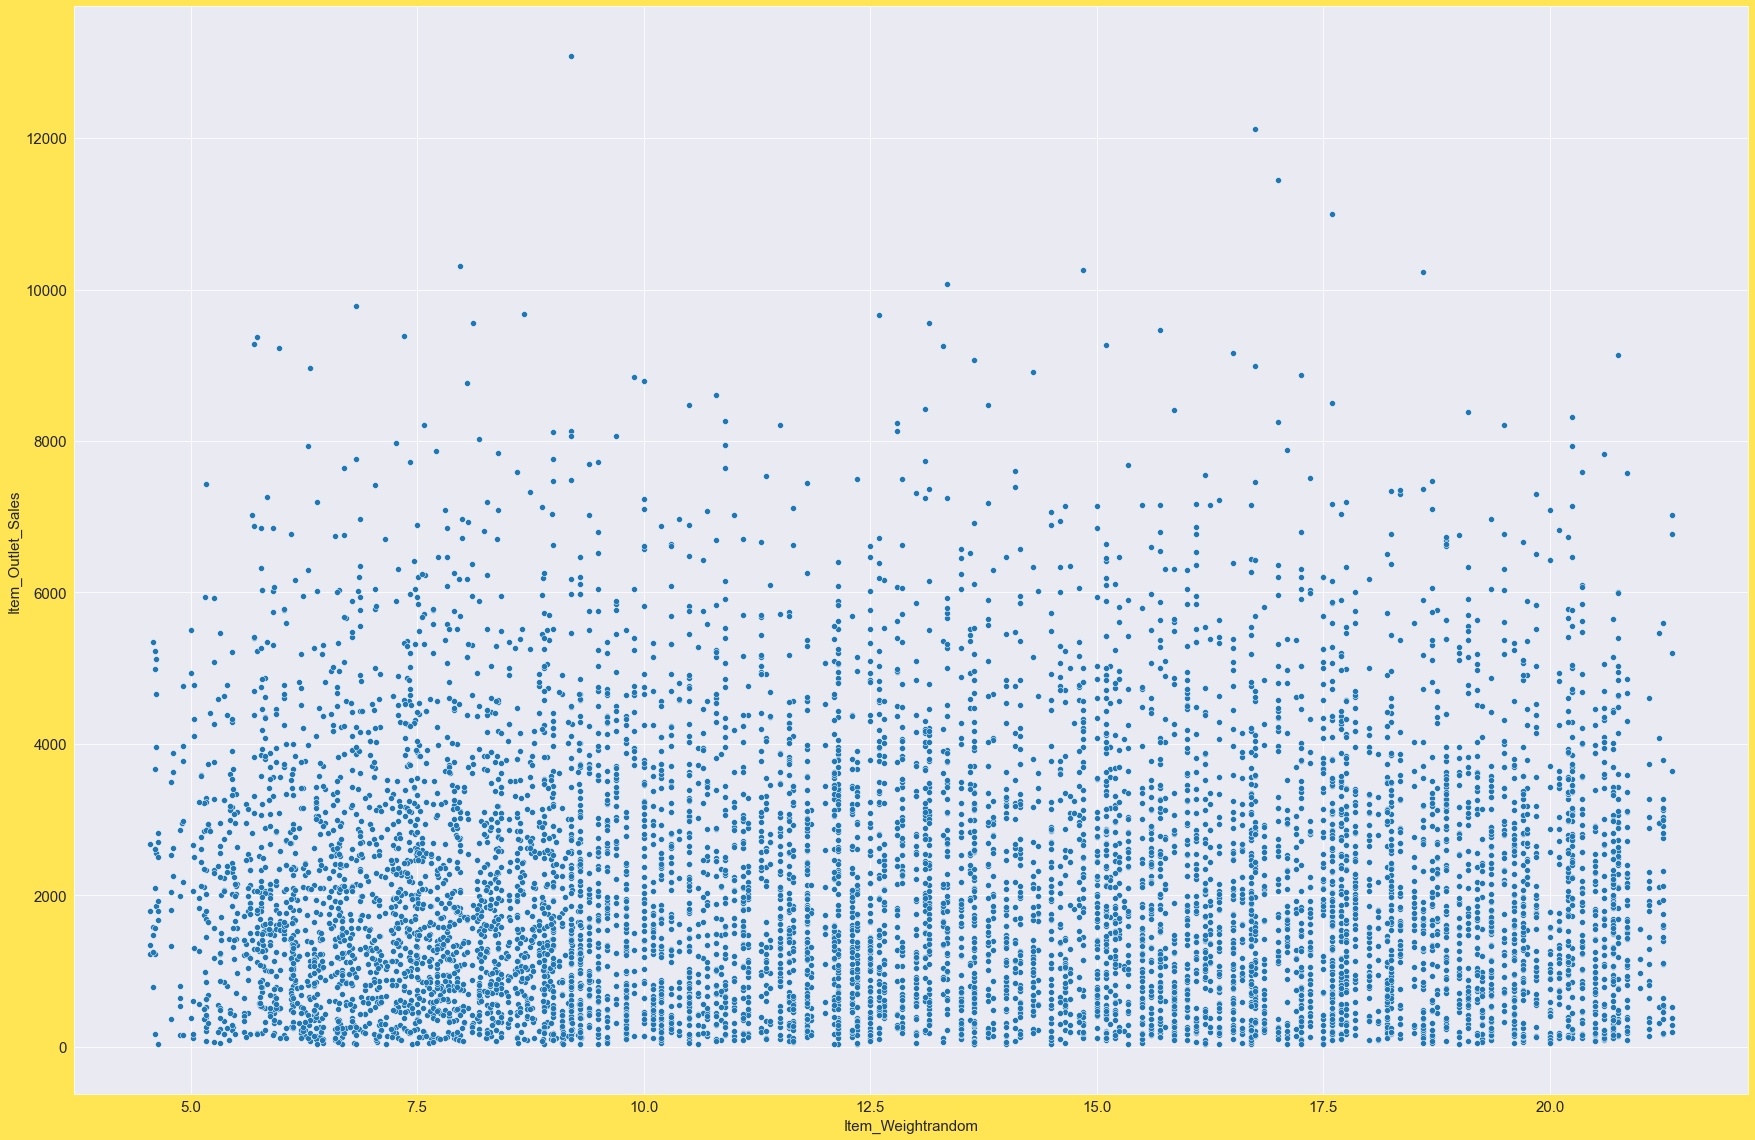

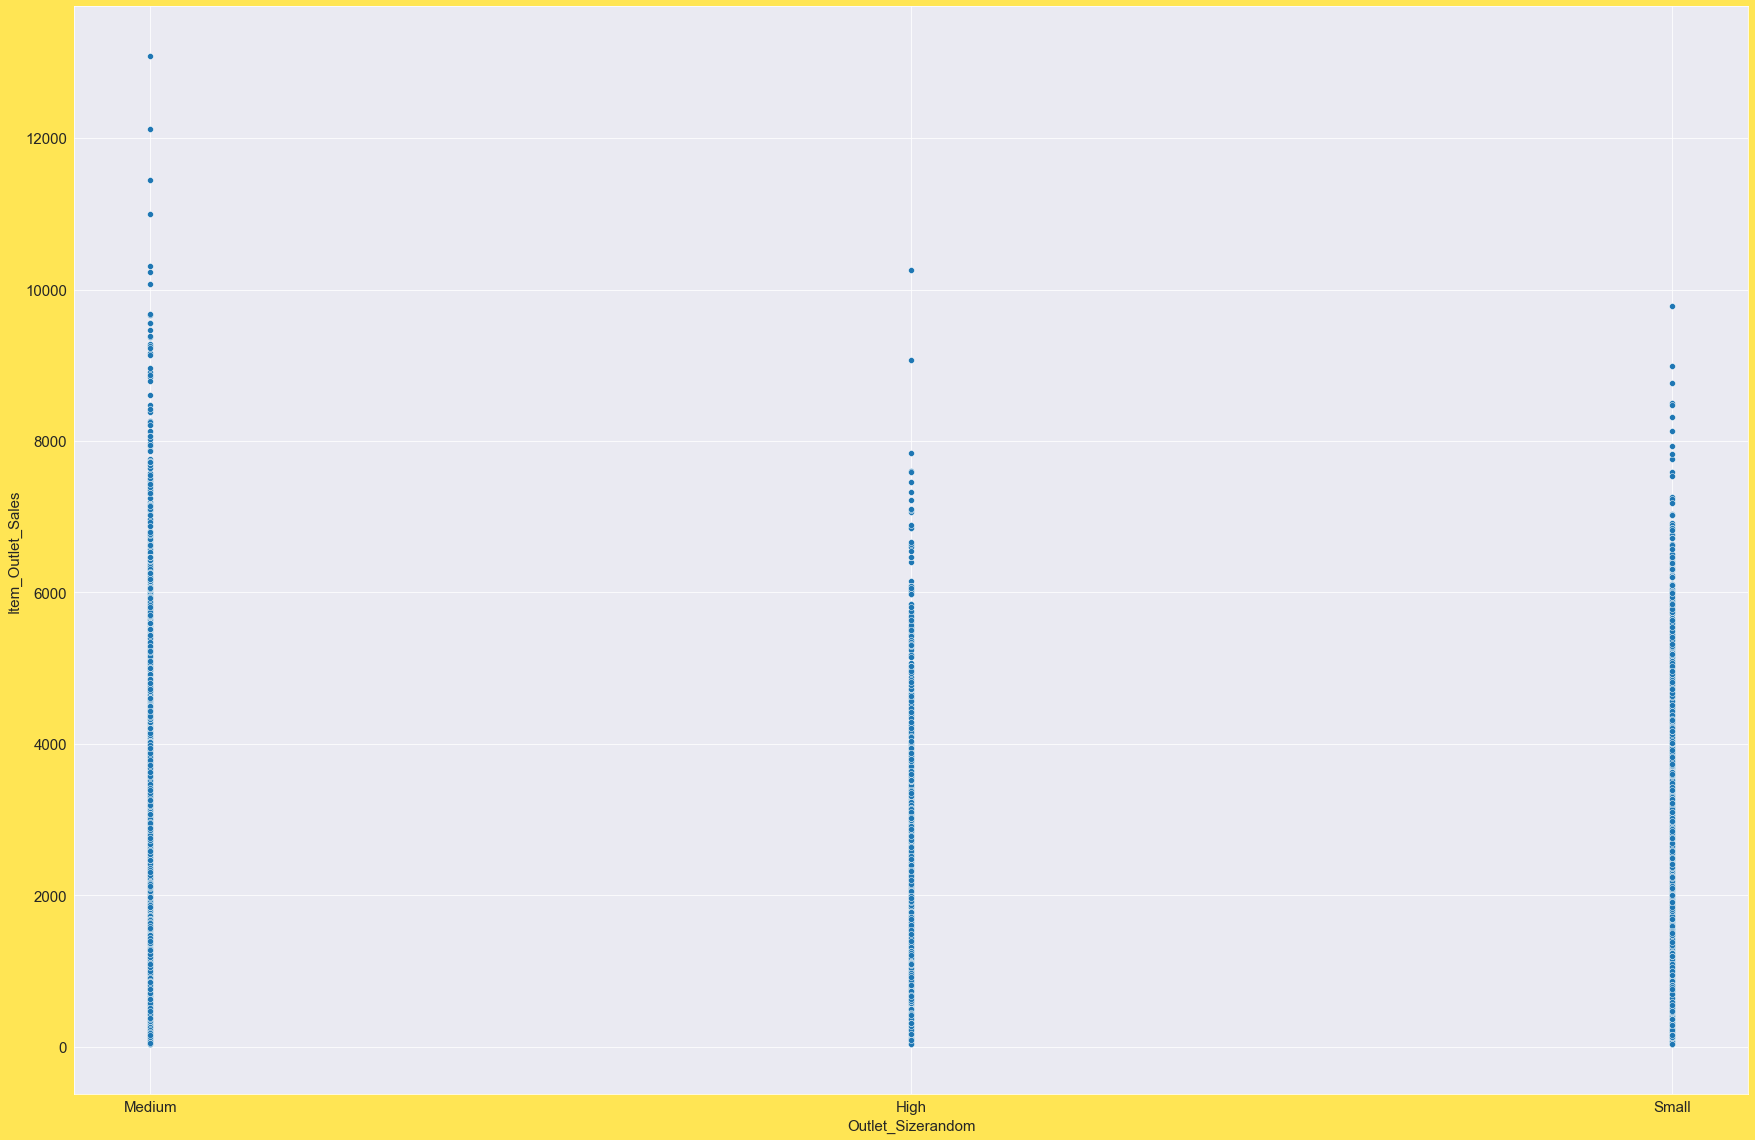

In [87]:
for i in sales_train.columns:
    
    plt.figure(figsize=(30,20))
    sns.scatterplot(i,'Item_Outlet_Sales',data=sales_train)
    plt.show()

Observations:
    
1. NC category item_identifier is contributing more in the target,item_Outlet_sales.


2. Low fat content items are contributing  a little more than Regular items.


3. Sales are higher if the item visibility is between .00 to .005


4. House hold items are sold more, following fruits and Vegatbles and SNACK Items.


5. Interestingly, High priced items are having more sales than the least priced.


6. Outlet OUT027 has more sales comapred to other outlets.


7. Supermarket type 3 contributes significantly more for the item sales


8. Tier 3 cities contributes has more sales


9. Medium sized outlets had more sales.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

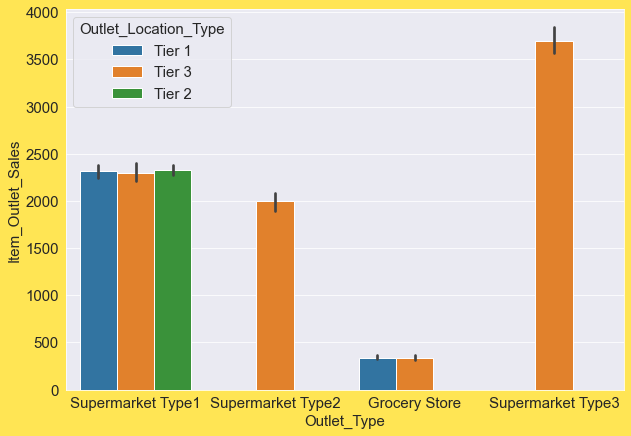

In [88]:
sns.barplot(sales_train['Outlet_Type'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Location_Type'])

# all the locations are cities have supermarket Type 1 outlets 

# While,Super market type 2 and 3 are prsent only in Tier 3 locations

# Also Grocery stores are present only in Tier 1 and Tier 3 locations


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

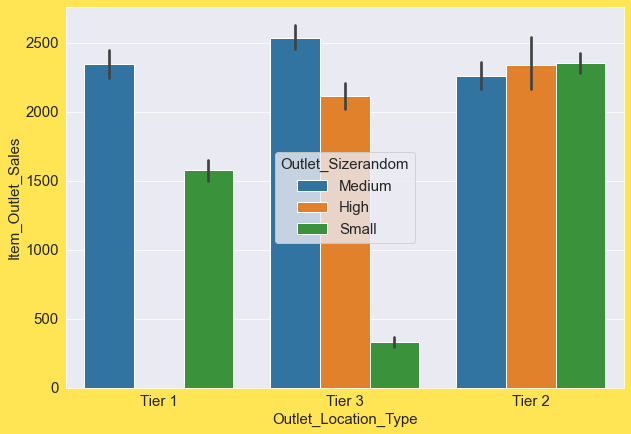

In [89]:
sns.barplot(sales_train['Outlet_Location_Type'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Sizerandom'])

# we can observe all only Tier 3 and 2 locations are given all types of outlet sizes 

# where for Tier 2 locations outlet sizes has been given equally

# However, Tier 3 medium size outlets has contributed more for the sales 

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

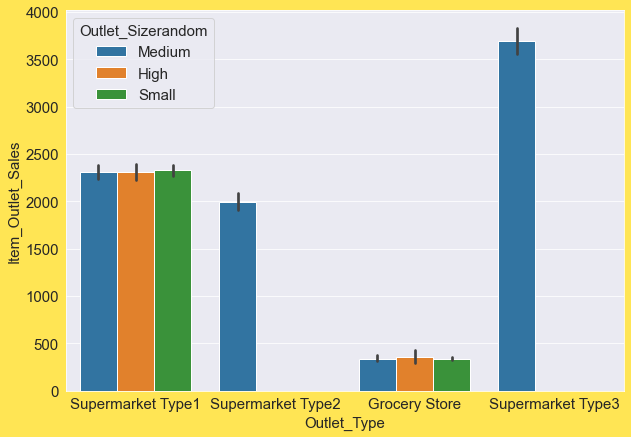

In [90]:
sns.barplot(sales_train['Outlet_Type'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Sizerandom'])

# Only Medium size outlets are given for setting up Supermarket type 3 and 2 outlets

# An highly equal amount of sizes are given to Supermarket 1 outlets

# all the sizes in a fewer number are given to the groceries, which makes sense because grociers outlets are less in number

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

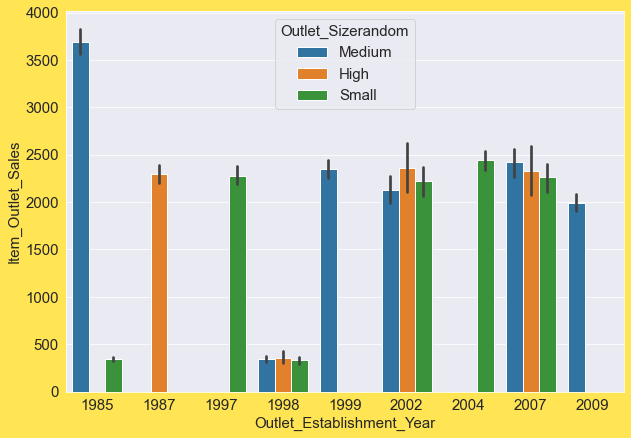

In [91]:
sns.barplot(sales_train['Outlet_Establishment_Year'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Sizerandom'])

# Outlets were initially started as medium and small sized outlets in 1985

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

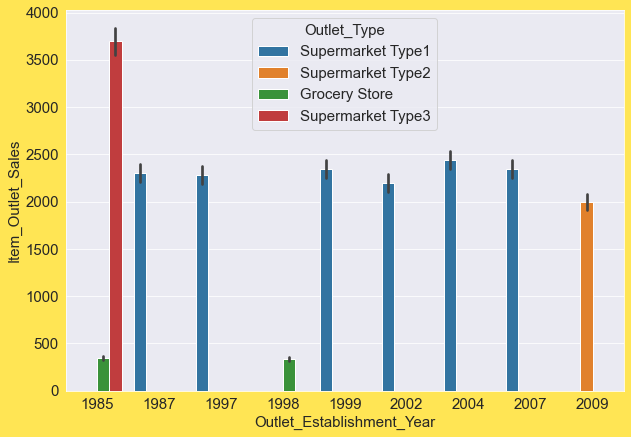

In [92]:
sns.barplot(sales_train['Outlet_Establishment_Year'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Type'])

# supermarket type  1 was the most used outlet
# where as type 3 and type 2 were used only in 1985 and 2009 respectively 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

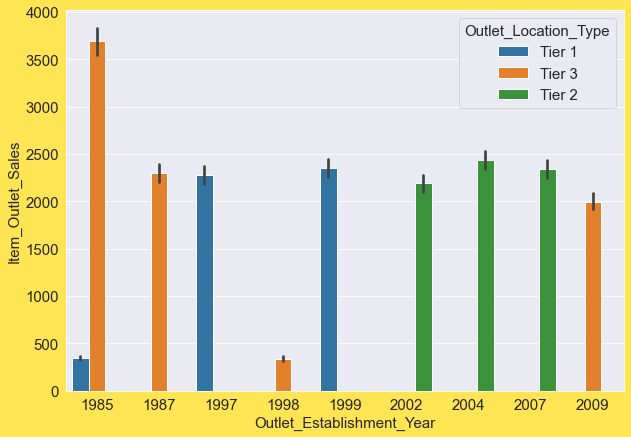

In [93]:
sns.barplot(sales_train['Outlet_Establishment_Year'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Location_Type'])

# According to the relplot Tier1 and tier3 cities outlet_Establishment_Year were established in 1985 whereas tier2 got outlets after 2000.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

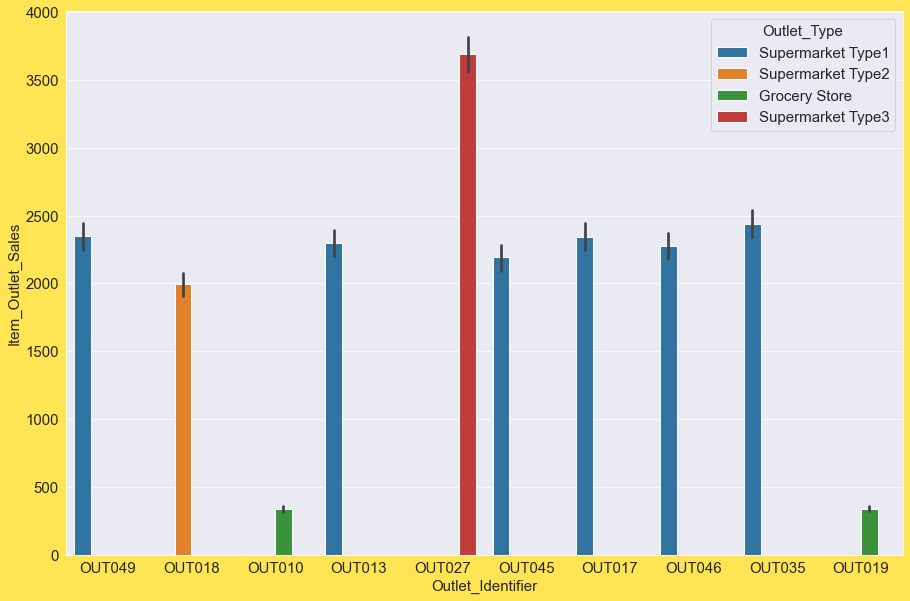

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Identifier'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Type'])

# Most identifier are supermarket 1, it makes sense because it was the most used outlet types in all the years
# There is only one outlet identifier for supermarket 2 and 3 while most of the outlet identifiers belong to supermarket1


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

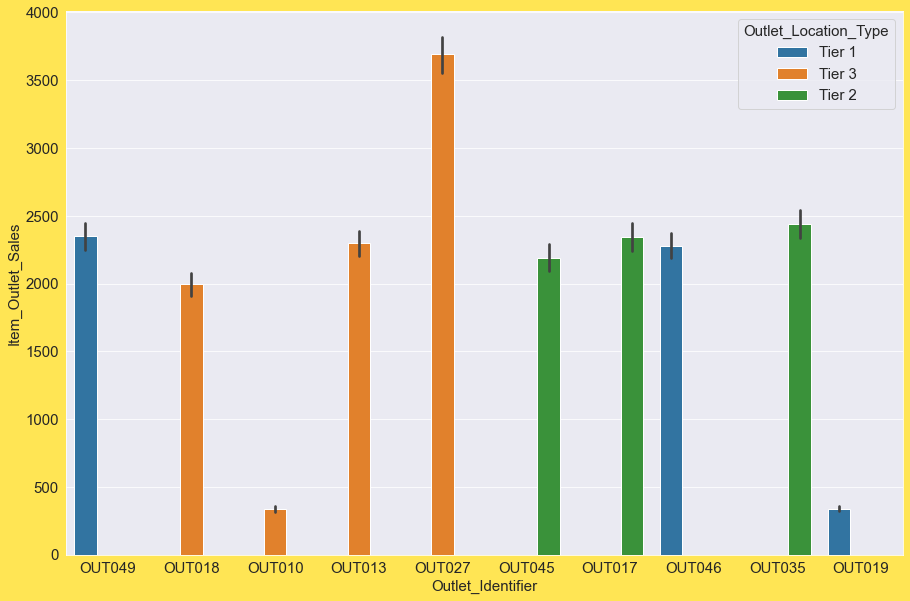

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Identifier'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Location_Type'])

# Tier 3 location has the most diff types of outlets, but they are almost balanced.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

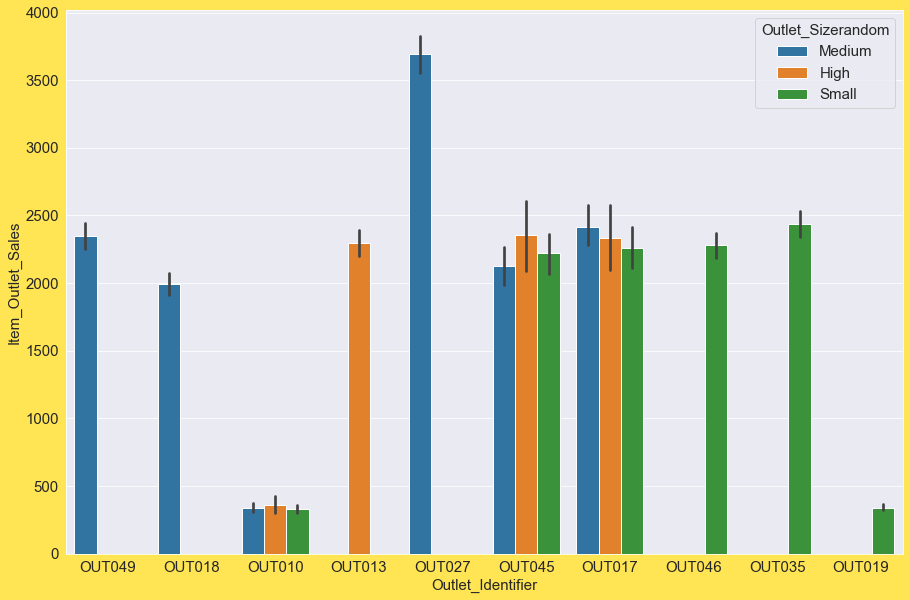

In [96]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Identifier'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Sizerandom'])

# Outlet 27 represents the most medium size outlets.
# Only Outlet13 with high outlet size.

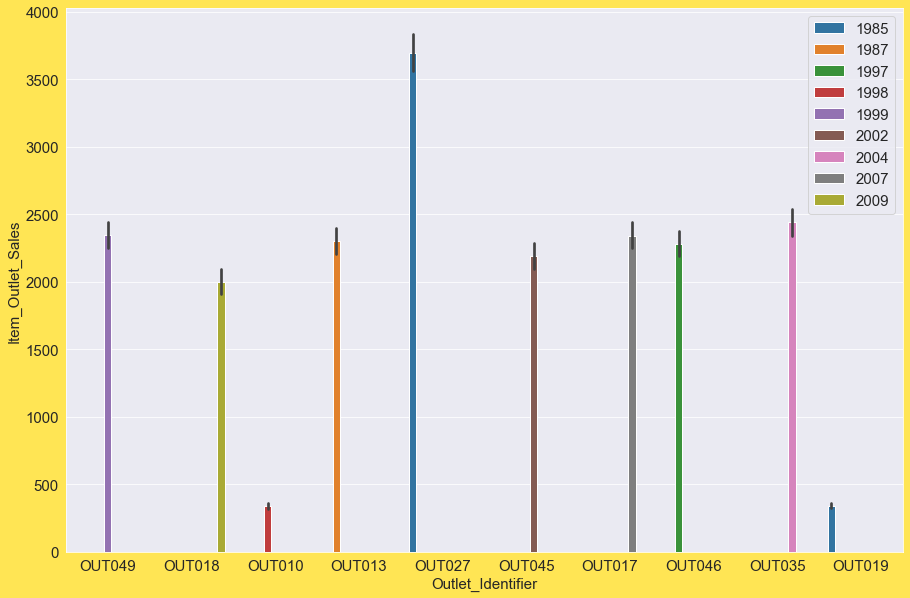

In [97]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Identifier'],sales_train['Item_Outlet_Sales'],hue=sales_train['Outlet_Establishment_Year'])
plt.legend(loc='upper right')


# According to the figure,Outlet 27 and 19 are the oldest outlet identifier and outlet 18 is the newest.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

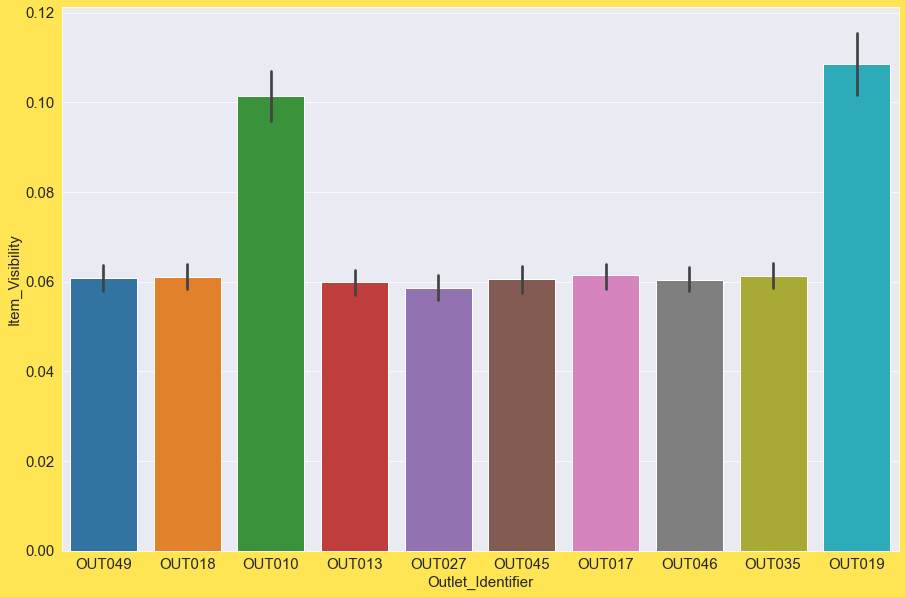

In [98]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Identifier'],sales_train['Item_Visibility'])

# Only Outlet 10 and 19 gives the highest visibilty.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

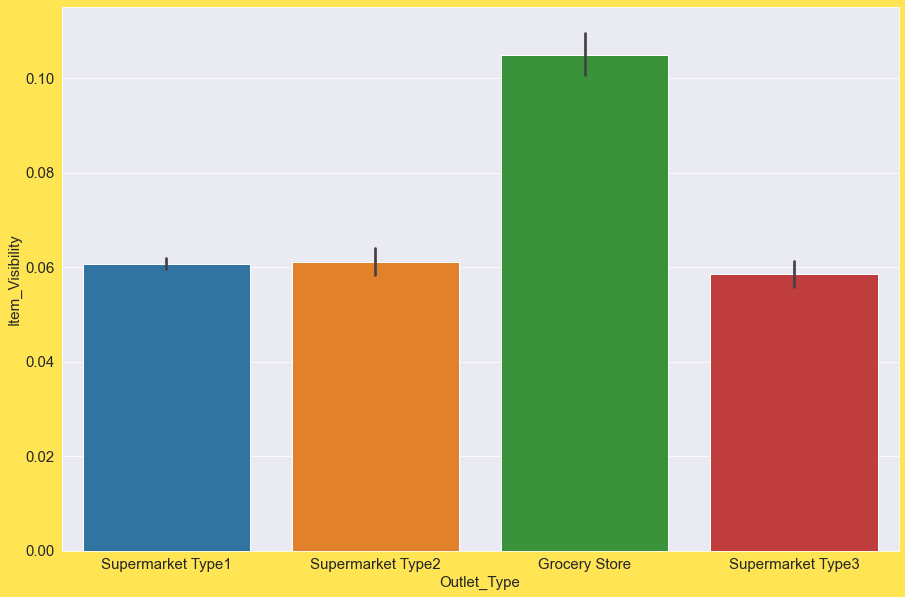

In [99]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Type'],sales_train['Item_Visibility'])

# Grocery store has significantly high item_visibility than other outlet types


<AxesSubplot:xlabel='Outlet_Sizerandom', ylabel='Item_Visibility'>

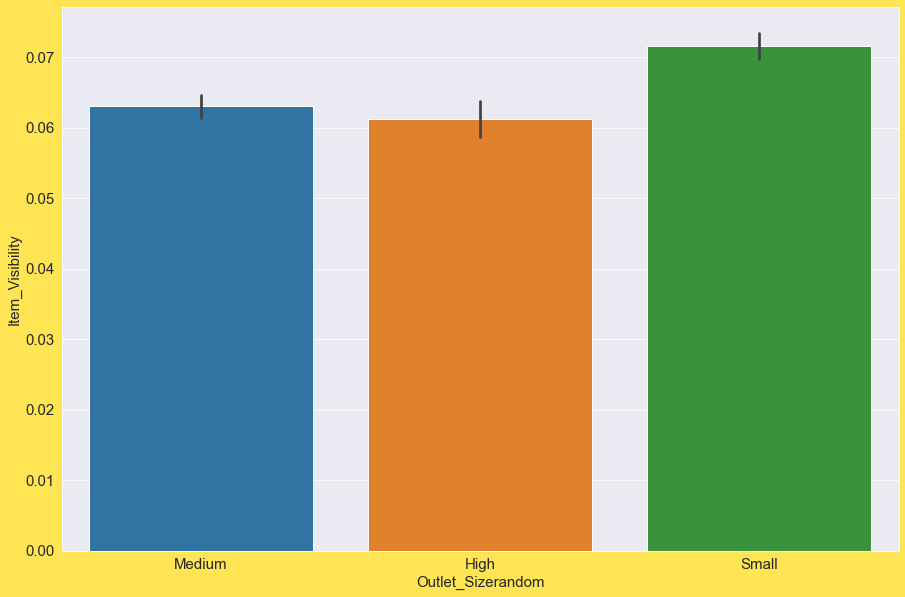

In [100]:
plt.figure(figsize=(15,10))
sns.barplot(sales_train['Outlet_Sizerandom'],sales_train['Item_Visibility'])

# small outlet sizes are having more item visibility

(array([0, 1]), [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

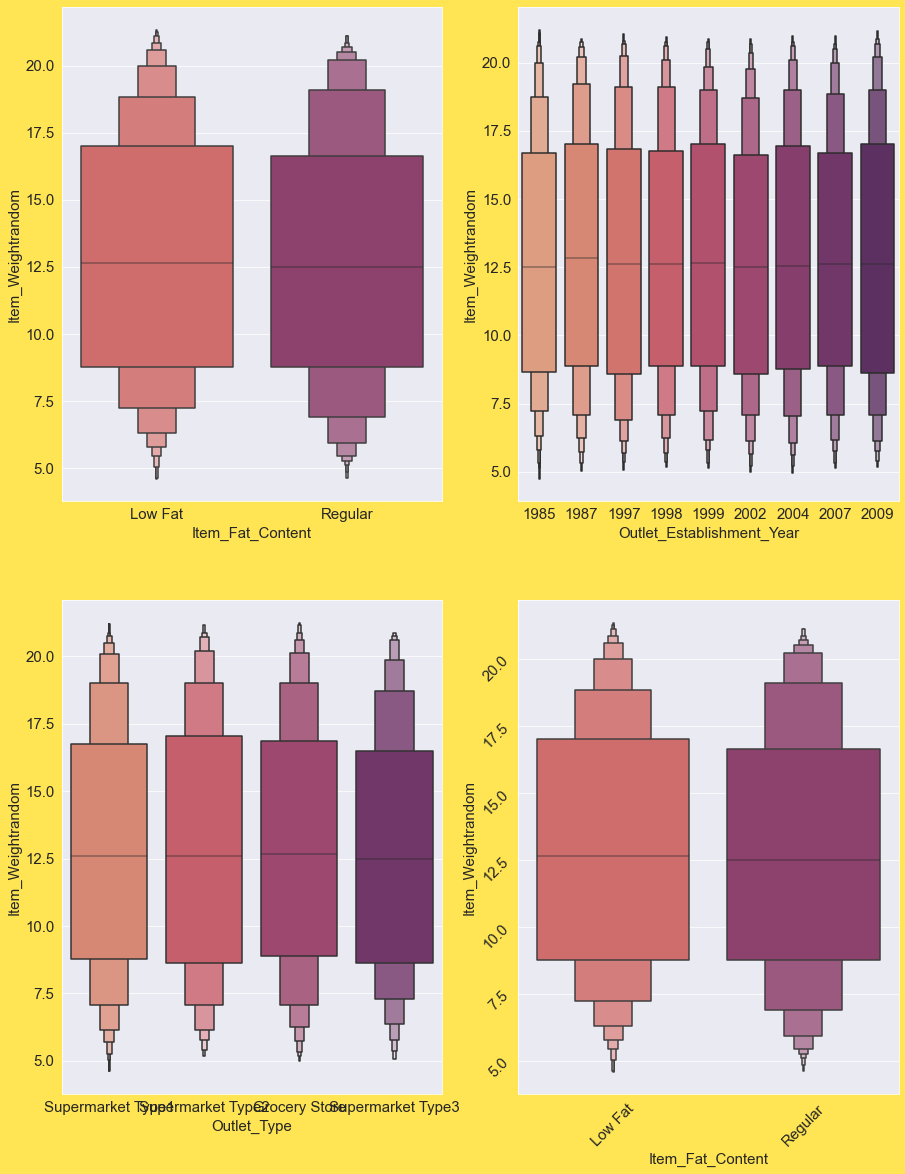

In [101]:
fig,ax=plt.subplots(2,2,figsize=(15,20))
plt.yticks(rotation=45)
l=0
p=0
for b,n in enumerate(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content']):
    if b%2==0 and b>0:
        l+=1
        p=0
    sns.boxenplot(x=sales_train[n],y=sales_train['Item_Weightrandom'],ax=ax[l,p],showfliers = False,palette='flare')
    p+=1
    
plt.xticks(rotation=45)

<function matplotlib.pyplot.show(close=None, block=None)>

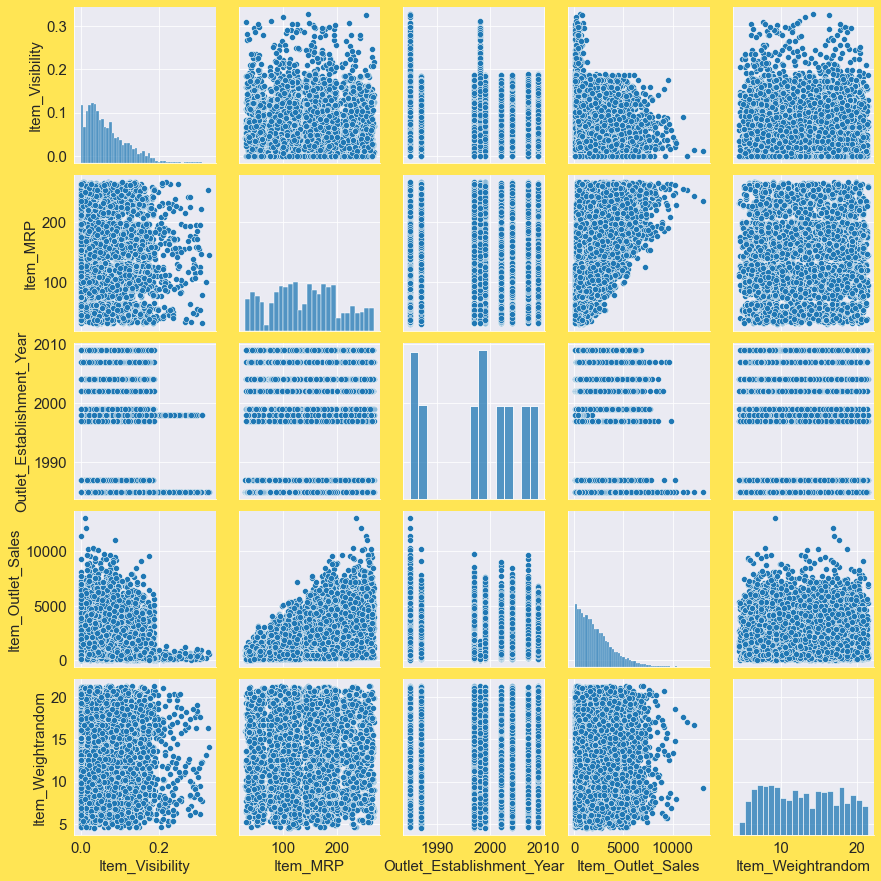

In [102]:
sns.pairplot(sales_train)
plt.show

In [103]:
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Sizerandom']

In [104]:
#Using Ordinal Encoder for encoding object type values

from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()

In [105]:
sales_train.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weightrandom            float64
Outlet_Sizerandom             object
dtype: object

In [106]:
cont_cols

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weightrandom
0            0.016047  249.8092                       1999              9.300
1            0.019278   48.2692                       2009              5.920
2            0.016760  141.6180                       1999             17.500
3            0.000000  182.0950                       1998             19.200
4            0.000000   53.8614                       1987              8.930
...               ...       ...                        ...                ...
8518         0.056783  214.5218                       1987              6.865
8519         0.046982  108.1570                       2002              8.380
8520         0.035186   85.1224                       2004             10.600
8521         0.145221  103.1332                       2009              7.210
8522         0.044878   75.4670                       1997             14.800

[8523 rows x 4 columns]

In [107]:
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Sizerandom']

In [108]:
# USING ONEHOT ENCODING BEACAUSE THE CATEGORICAL FEATURES CONTAIN NOMINAL DATA WHICH DOESN'T FOLLOW ANY ORDER
# DROPPED THE FIRST DUMMY COLUMN AFTER ENCODING
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

df_object = sales_train.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(cat_cols)

sales_train = pd.concat([sales_train.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)


In [109]:
# Encoding item establishment year using ordinal encoding, because it follows some order relevance to the data
from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()
sales_train['Outlet_Establishment_Year'] = Oe.fit_transform(sales_train['Outlet_Establishment_Year'].values.reshape(-1,1))

In [110]:
sales_train.head()

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales  \
0         0.016047  249.8092                        4.0          3735.1380   
1         0.019278   48.2692                        8.0           443.4228   
2         0.016760  141.6180                        4.0          2097.2700   
3         0.000000  182.0950                        3.0           732.3800   
4         0.000000   53.8614                        1.0           994.7052   

   Item_Weightrandom  Item_Identifier_FD  Item_Identifier_NC  \
0               9.30                   1                   0   
1               5.92                   0                   0   
2              17.50                   1                   0   
3              19.20                   1                   0   
4               8.93                   0                   1   

   Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  ...  \
0                         0                 0                    0  ...   
1                         1                 0                    0  ...   
2                         0                 0                    0  ...   
3                         1                 0                    0  ...   
4                         0                 0                    0  ...   

   Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT049  Outlet_Location_Type_Tier 2  \
0                         1                            0   
1                         0                            0   
2                         1                            0   
3                         0                            0   
4                         0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            1                              0   
2                            0                              1   
3                            1                              0   
4                            1                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                              0                              0   
1                              1                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Outlet_Sizerandom_Medium  Outlet_Sizerandom_Small  
0                         1                        0  
1                         1                        0  
2                         1                        0  
3                         0                        0  
4                         0                        0  

[5 rows x 39 columns]

In [111]:
# Doing the same for the test data
OneHotEncoder()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

df_object = sales_test.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(cat_cols)

sales_test = pd.concat([sales_test.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [112]:
from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()
sales_test['Outlet_Establishment_Year'] = Oe.fit_transform(sales_test['Outlet_Establishment_Year'].values.reshape(-1,1))

In [113]:
sales_test.head()

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weightrandom  \
0         0.007565  107.8622                        4.0             20.750   
1         0.038428   87.3198                        7.0              8.300   
2         0.099575  241.7538                        3.0             14.600   
3         0.015388  155.0340                        7.0              7.315   
4         0.118599  234.2300                        0.0             10.500   

   Item_Identifier_FD  Item_Identifier_NC  Item_Fat_Content_Regular  \
0                   1                   0                         0   
1                   1                   0                         1   
2                   0                   1                         0   
3                   1                   0                         0   
4                   1                   0                         1   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0                 0                    0                 0  ...   
1                 0                    0                 0  ...   
2                 0                    0                 0  ...   
3                 0                    0                 0  ...   
4                 0                    0                 0  ...   

   Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT049  Outlet_Location_Type_Tier 2  \
0                         1                            0   
1                         0                            1   
2                         0                            0   
3                         0                            1   
4                         0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            0                              1   
2                            1                              0   
3                            0                              1   
4                            1                              0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              1   

   Outlet_Sizerandom_Medium  Outlet_Sizerandom_Small  
0                         1                        0  
1                         0                        1  
2                         0                        1  
3                         1                        0  
4                         1                        0  

[5 rows x 38 columns]

In [114]:
# checking the test data datatypes
sales_train.dtypes

Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Outlet_Sales                  float64
Item_Weightrandom                  float64
Item_Identifier_FD                   int32
Item_Identifier_NC                   int32
Item_Fat_Content_Regular             int32
Item_Type_Breads                     int32
Item_Type_Breakfast                  int32
Item_Type_Canned                     int32
Item_Type_Dairy                      int32
Item_Type_Frozen Foods               int32
Item_Type_Fruits and Vegetables      int32
Item_Type_Hard Drinks                int32
Item_Type_Health and Hygiene         int32
Item_Type_Household                  int32
Item_Type_Meat                       int32
Item_Type_Others                     int32
Item_Type_Seafood                    int32
Item_Type_Snack Foods                int32
Item_Type_Soft Drinks                int32
Item_Type_Starchy Foods              int32
Outlet_Iden

In [115]:
# Checking the correlation
sales_train.corr().T

Item_Visibility  Item_MRP  \
Item_Visibility                         1.000000 -0.001315   
Item_MRP                               -0.001315  1.000000   
Outlet_Establishment_Year              -0.082927  0.004162   
Item_Outlet_Sales                      -0.128625  0.567574   
Item_Weightrandom                      -0.015014  0.021790   
Item_Identifier_FD                      0.068133  0.029315   
Item_Identifier_NC                     -0.064358  0.004859   
Item_Fat_Content_Regular                0.047314  0.006063   
Item_Type_Breads                        0.000416 -0.000112   
Item_Type_Breakfast                     0.043418  0.001460   
Item_Type_Canned                        0.011114 -0.005666   
Item_Type_Dairy                         0.035984  0.035551   
Item_Type_Frozen Foods                 -0.003153 -0.013358   
Item_Type_Fruits and Vegetables         0.018969  0.023688   
Item_Type_Hard Drinks                  -0.003700 -0.010089   
Item_Type_Health and Hygiene           -0.053931 -0.041646   
Item_Type_Household                    -0.032230  0.046815   
Item_Type_Meat                         -0.017087 -0.004086   
Item_Type_Others                       -0.016240 -0.018595   
Item_Type_Seafood                       0.014910  0.001186   
Item_Type_Snack Foods                   0.005635  0.033817   
Item_Type_Soft Drinks                  -0.009825 -0.035808   
Item_Type_Starchy Foods                 0.003688  0.014613   
Outlet_Identifier_OUT013               -0.041937  0.002438   
Outlet_Identifier_OUT017               -0.032179 -0.008812   
Outlet_Identifier_OUT018               -0.034671  0.003850   
Outlet_Identifier_OUT019                0.210736 -0.004976   
Outlet_Identifier_OUT027               -0.051144 -0.006714   
Outlet_Identifier_OUT035               -0.033025  0.011969   
Outlet_Identifier_OUT045               -0.038353 -0.000239   
Outlet_Identifier_OUT046               -0.038444  0.005983   
Outlet_Identifier_OUT049               -0.036130 -0.003906   
Outlet_Location_Type_Tier 2            -0.068787  0.001951   
Outlet_Location_Type_Tier 3             0.009650 -0.000744   
Outlet_Type_Supermarket Type1          -0.144249  0.004885   
Outlet_Type_Supermarket Type2          -0.034671  0.003850   
Outlet_Type_Supermarket Type3          -0.051144 -0.006714   
Outlet_Sizerandom_Medium               -0.053842 -0.002841   
Outlet_Sizerandom_Small                 0.084418 -0.003244   

                                 Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Visibility                                  -0.082927          -0.128625   
Item_MRP                                          0.004162           0.567574   
Outlet_Establishment_Year                         1.000000          -0.025525   
Item_Outlet_Sales                                -0.025525           1.000000   
Item_Weightrandom                                -0.000724           0.005189   
Item_Identifier_FD                                0.000101           0.031905   
Item_Identifier_NC                               -0.006088          -0.010861   
Item_Fat_Content_Regular                          0.002447           0.018719   
Item_Type_Breads                                 -0.003676           0.002332   
Item_Type_Breakfast                              -0.005702          -0.004656   
Item_Type_Canned                                  0.011803           0.007387   
Item_Type_Dairy                                  -0.005583           0.008858   
Item_Type_Frozen Foods                            0.004600          -0.009482   
Item_Type_Fruits and Vegetables                  -0.003559           0.025950   
Item_Type_Hard Drinks                             0.005986          -0.003956   
Item_Type_Health and Hygiene                     -0.002362          -0.025587   
Item_Type_Household                              -0.003830           0.015701   
Item_Type_Meat                                   -0.013434          -0.002995   
Item_Type_Oth

<AxesSubplot:>

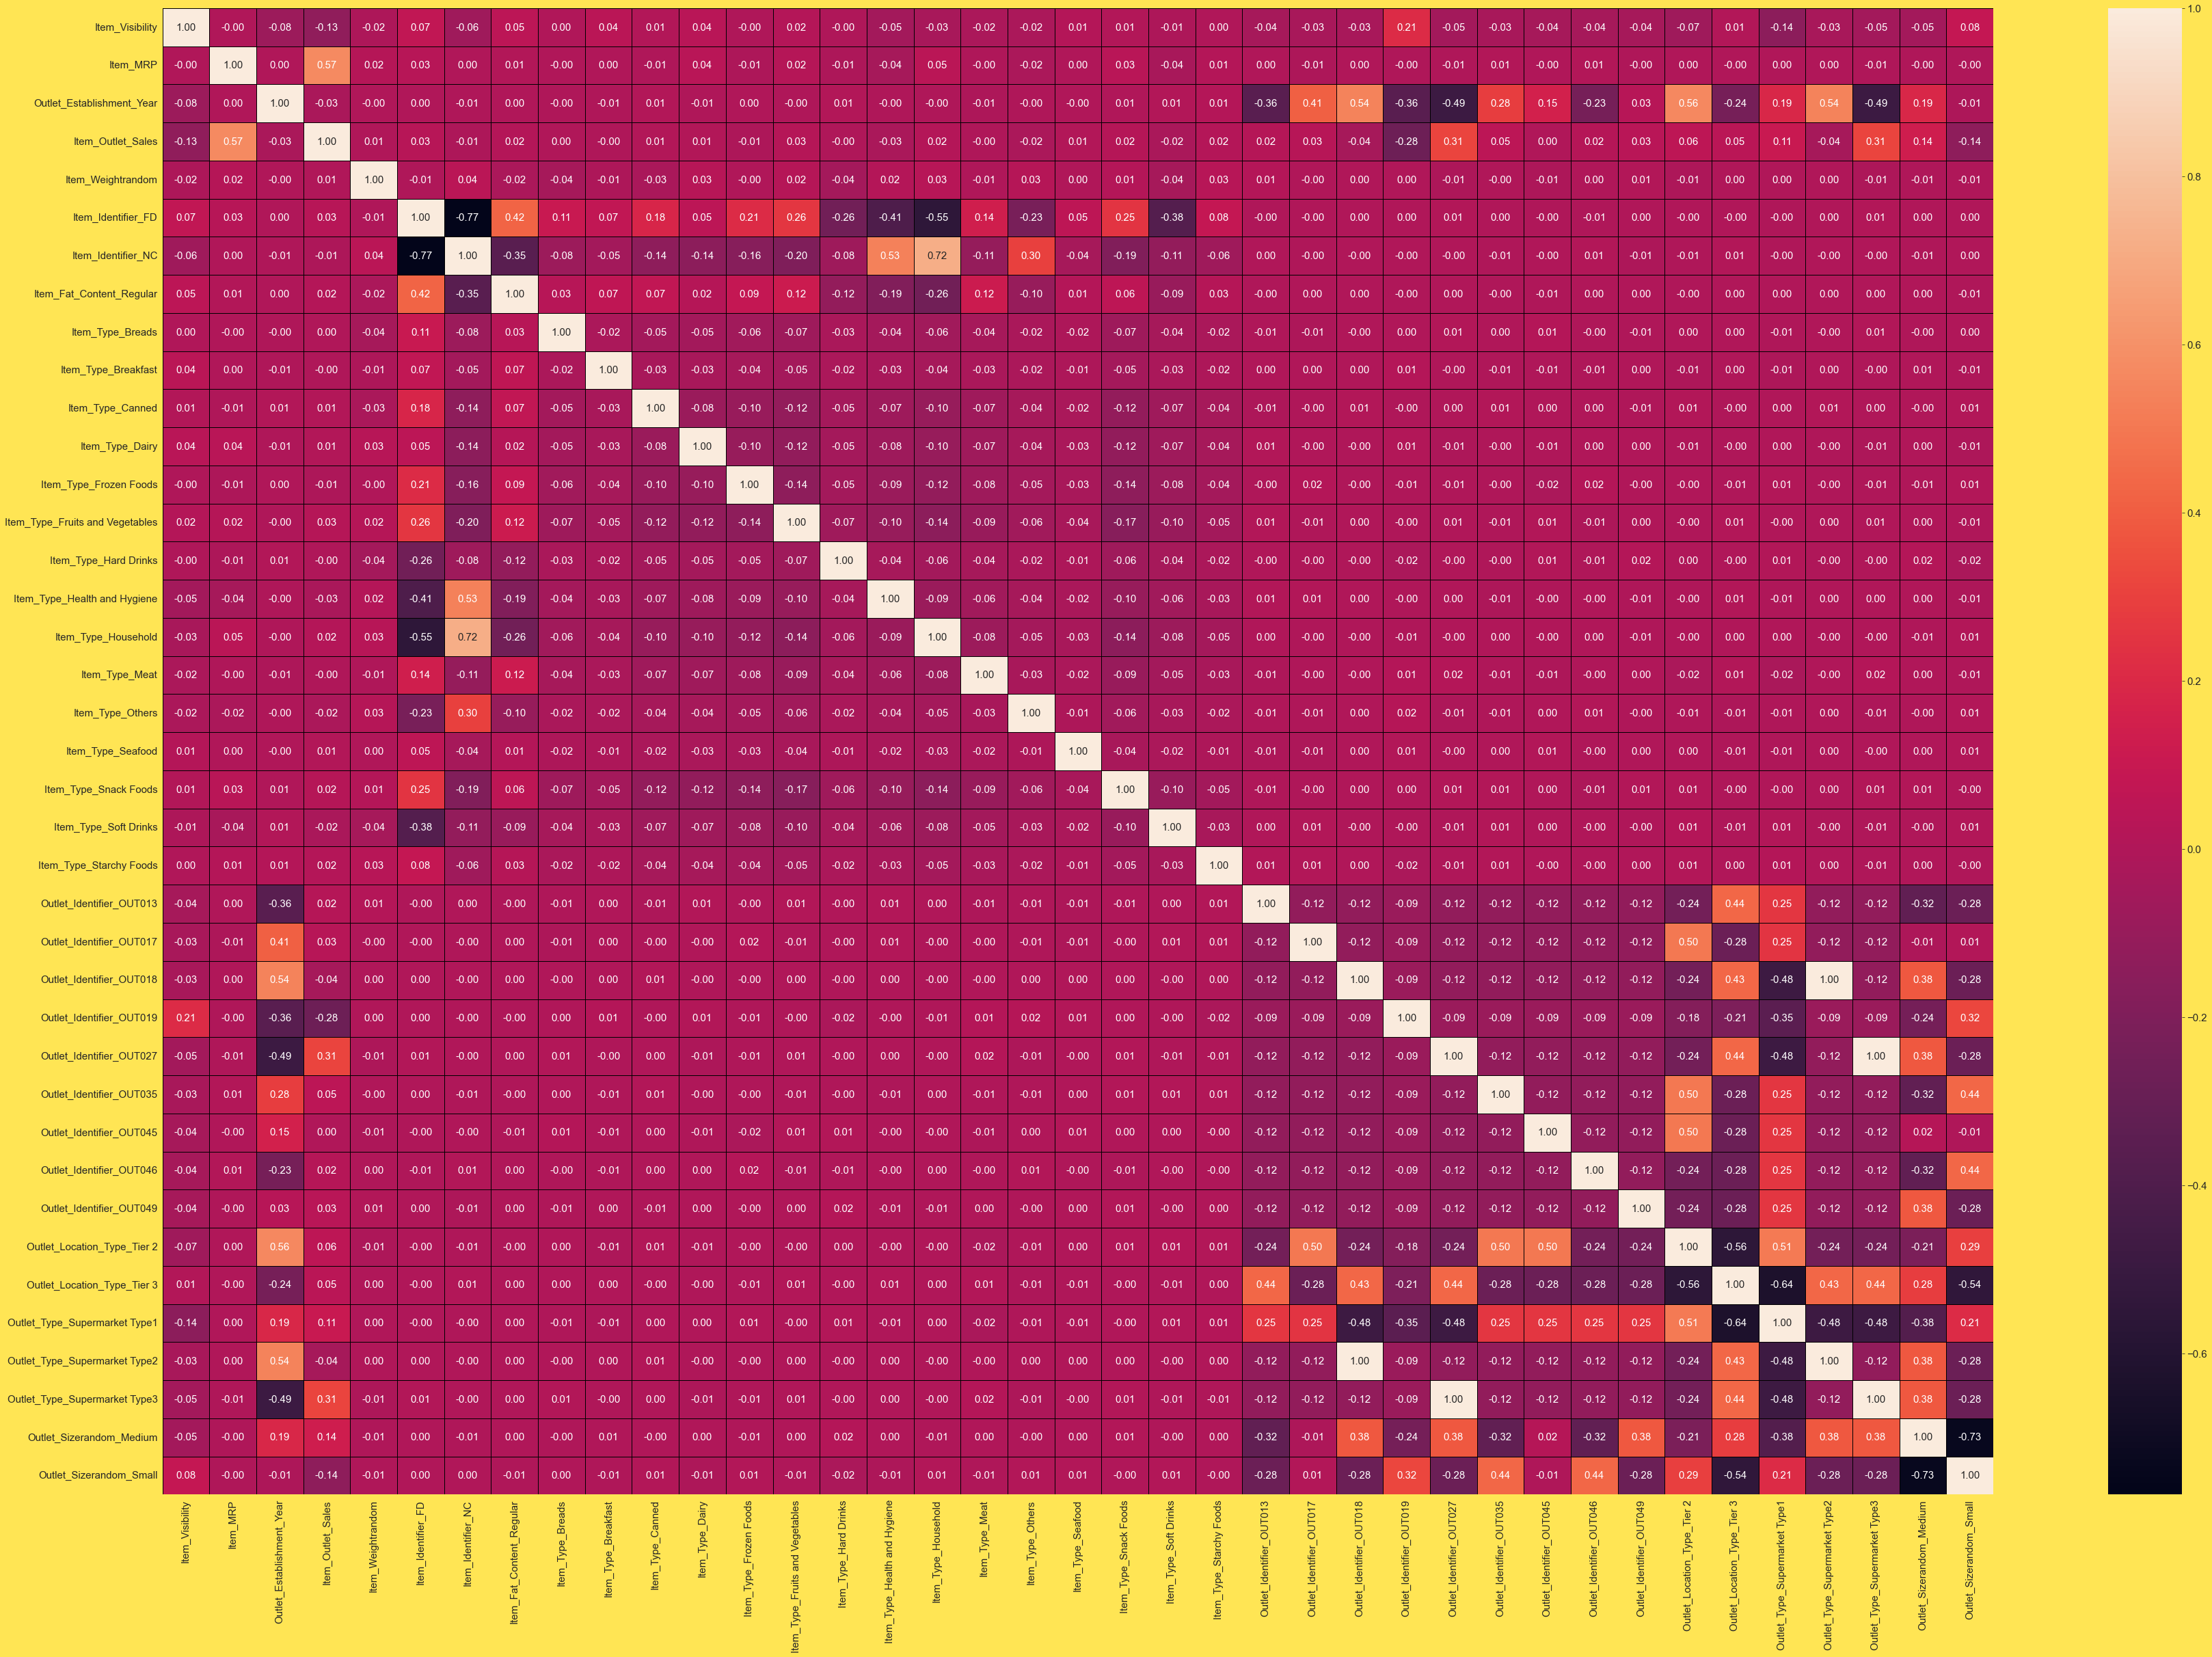

In [116]:
# plotting a heatmap
plt.figure(figsize=(60,40))
sns.heatmap(sales_train.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Observations:-
    
-> Item_MRP and Outlet_Type are highly correlated with the target Item_Outlet_Sales.

-> Item identifier and Item_Weightrandom are least correlated with the target with 0.01%

-> all the other features are least correlated with the target



### CHECKING THE MULTICOLLINEARITY

In [117]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# CREATING A FUNCTION AND A DATAFRAME TO COMAPRE THE VIF SCORE OF EACH CONTINUOIUS COLUMN
def vif_calc():
    vif = pd.DataFrame()
    vif['Features'] = cont_cols.columns
    vif['VIF Factor'] = [variance_inflation_factor(cont_cols.values,i) for i in range(cont_cols.shape[1])]
    print(vif)

In [119]:
vif_calc()

# Outlet_Establishment score has become catgorical encoded so we will not drop it

                    Features  VIF Factor
0            Item_Visibility    2.641228
1                   Item_MRP    6.129404
2  Outlet_Establishment_Year   15.276414
3          Item_Weightrandom    8.679862


In [125]:
cont_cols.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

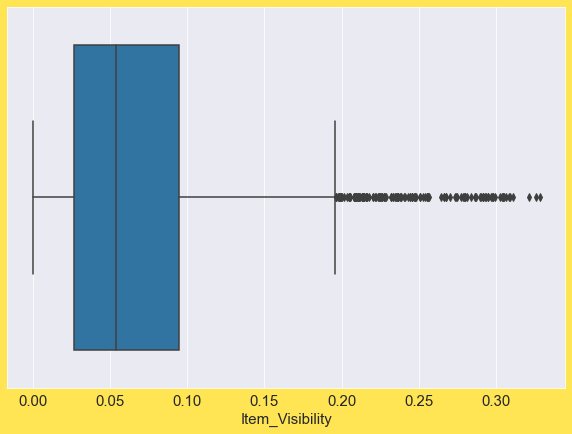

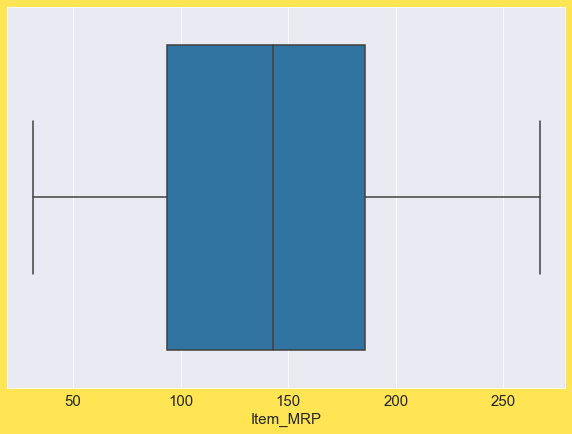

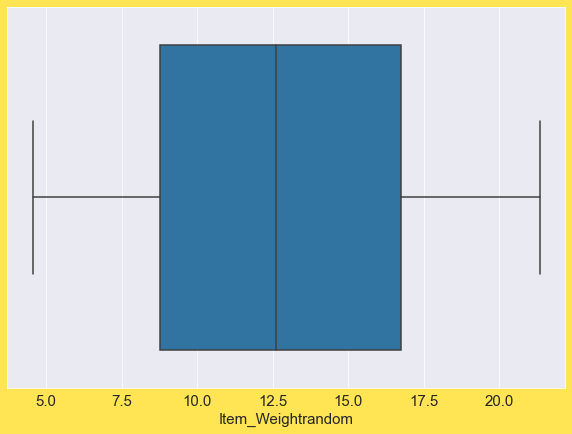

In [126]:
# CHECKING OUTLIERS

for i in cont_cols:
    sns.boxplot(sales_train[i])
    plt.show()
    
# We can see that only Item_Visibility has outliers but are continuous, so its doesnot affect the model

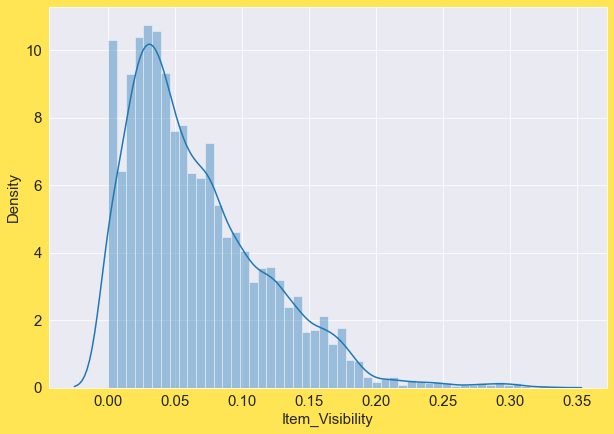

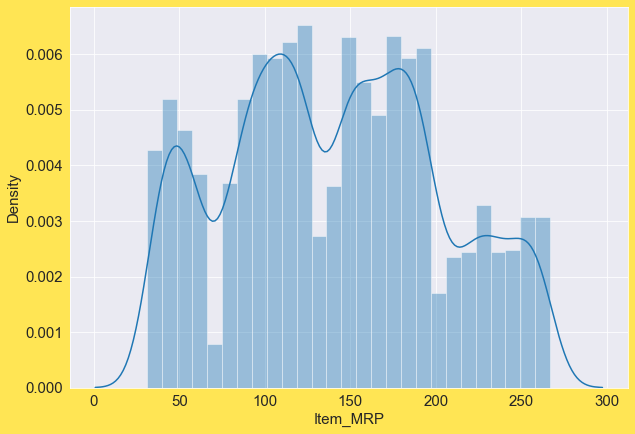

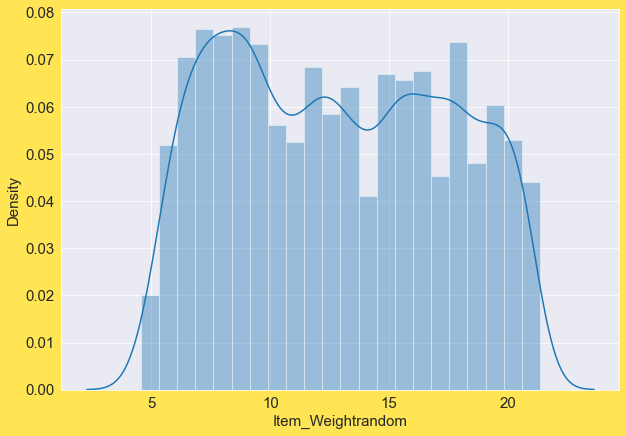

In [127]:
# CHECKING SKEWNESS
for i in cont_cols:
    sns.distplot(sales_train[i])
    plt.show()
    
# We can see there is skewness present in all the continuous features

In [128]:
# REMOVING THE OUTLIERS from Item Visibility

from scipy.stats import zscore

z = np.abs(zscore(sales_train[['Item_Visibility','Item_MRP','Item_Weightrandom']]))

print(np.where(z>3))

(array([  49,   83,  108,  174,  434,  502,  521,  532,  854, 1159, 1272,
       1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1805,
       1827, 1841, 2088, 2122, 2251, 2324, 2439, 2445, 2586, 2613, 2728,
       2855, 2895, 3017, 3206, 3399, 3458, 3474, 3488, 3497, 3540, 3750,
       3767, 3884, 3993, 4006, 4219, 4382, 4408, 4530, 4656, 4674, 4789,
       4941, 5031, 5150, 5287, 5374, 5732, 5734, 5795, 5837, 5880, 5891,
       5946, 6008, 6012, 6179, 6536, 6576, 6622, 6674, 6786, 6903, 7005,
       7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558, 7603, 7744,
       7866, 7949, 8194, 8215, 8273, 8345, 8432], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [129]:
sales_train_new = sales_train[(z<3).all(axis=1)]

In [130]:
print("shape before and after")
print("shape before".ljust(20),":", sales_train.shape)
print("shape after".ljust(20),":", sales_train_new.shape)
print("Percentage Loss".ljust(20),":", (sales_train.shape[0]-sales_train_new.shape[0])/sales_train.shape[0]*100)

# Only 1% data is missing , so we will continue after removing outliers

shape before and after
shape before         : (8523, 39)
shape after          : (8428, 39)
Percentage Loss      : 1.1146309984747156


In [163]:
# doing the same for test data
from scipy.stats import zscore

z = np.abs(zscore(sales_test[['Item_Visibility','Item_MRP','Item_Weightrandom']]))

print(np.where(z>3))

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [165]:
sales_test_new = sales_test[(z<3).all(axis=1)]

In [167]:
print("shape before and after")
print("shape before".ljust(20),":", sales_test.shape)
print("shape after".ljust(20),":", sales_test_new.shape)
print("Percentage Loss".ljust(20),":", (sales_test.shape[0]-sales_test_new.shape[0])/sales_test.shape[0]*100)

# Only 1% data is missing , so we will continue after removing outliers

shape before and after
shape before         : (5681, 38)
shape after          : (5600, 38)
Percentage Loss      : 1.425805315965499


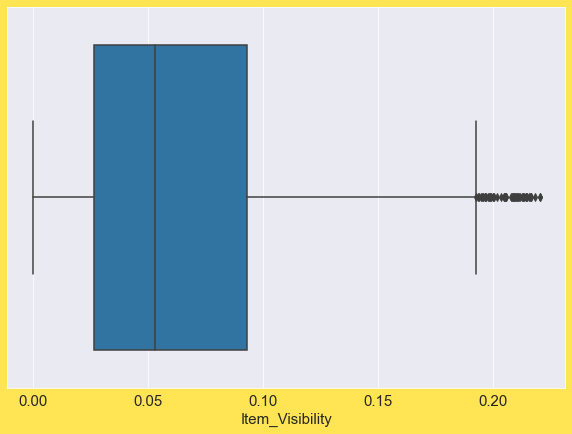

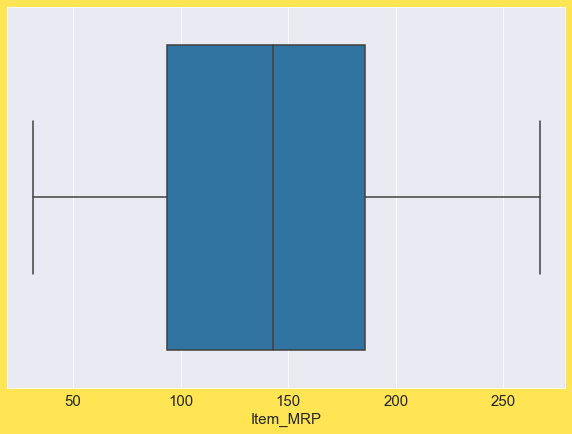

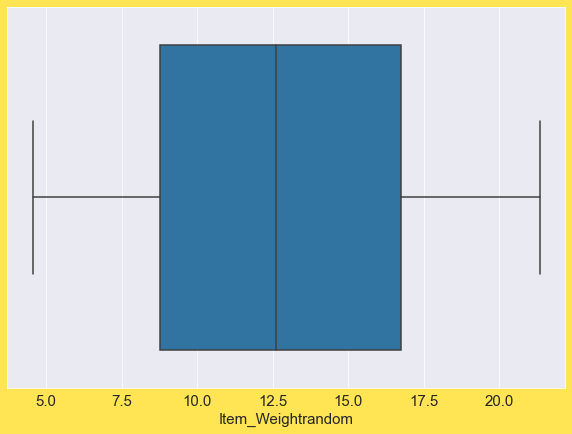

In [131]:
# checking Outliers Again
for i in cont_cols:
    sns.boxplot(sales_train_new[i])
    plt.show()
    
# We can see that Outliers have been removed from Item_Visibility
    

In [132]:
# Checking Skewness
sales_train_new.skew().sort_values()

Item_Identifier_FD                 -0.966318
Outlet_Type_Supermarket Type1      -0.683761
Outlet_Establishment_Year           0.021167
Item_Weightrandom                   0.088403
Item_MRP                            0.128945
Outlet_Sizerandom_Medium            0.151384
Outlet_Location_Type_Tier 3         0.440370
Outlet_Sizerandom_Small             0.478829
Item_Fat_Content_Regular            0.620786
Outlet_Location_Type_Tier 2         0.721061
Item_Visibility                     0.795956
Item_Outlet_Sales                   1.173070
Item_Identifier_NC                  1.592863
Item_Type_Fruits and Vegetables     2.022357
Item_Type_Snack Foods               2.068179
Outlet_Type_Supermarket Type3       2.478078
Outlet_Identifier_OUT027            2.478078
Outlet_Identifier_OUT013            2.483837
Outlet_Identifier_OUT049            2.487690
Outlet_Identifier_OUT035            2.487690
Outlet_Identifier_OUT046            2.487690
Outlet_Identifier_OUT045            2.489620
Outlet_Typ

In [168]:
sales_test_new.skew().sort_values()

Item_Identifier_FD                 -0.960601
Outlet_Type_Supermarket Type1      -0.693417
Outlet_Establishment_Year           0.018036
Item_Weightrandom                   0.128738
Item_MRP                            0.133061
Outlet_Sizerandom_Medium            0.142541
Outlet_Location_Type_Tier 3         0.442717
Outlet_Sizerandom_Small             0.483671
Item_Fat_Content_Regular            0.616007
Outlet_Location_Type_Tier 2         0.716410
Item_Visibility                     0.787861
Item_Identifier_NC                  1.563206
Item_Type_Snack Foods               2.090610
Item_Type_Fruits and Vegetables     2.103646
Item_Type_Household                 2.450511
Outlet_Type_Supermarket Type3       2.470431
Outlet_Identifier_OUT027            2.470431
Outlet_Identifier_OUT013            2.479058
Outlet_Identifier_OUT049            2.481946
Outlet_Identifier_OUT046            2.481946
Outlet_Identifier_OUT035            2.481946
Outlet_Identifier_OUT045            2.484840
Outlet_Ide

In [133]:
# training data
sales_train_new.skew()[['Item_Visibility','Item_MRP','Item_Weightrandom']].sort_values()

# Item Visibility has high skewness

Item_Weightrandom    0.088403
Item_MRP             0.128945
Item_Visibility      0.795956
dtype: float64

In [169]:
sales_test_new.skew()[['Item_Visibility','Item_MRP','Item_Weightrandom']].sort_values() # testing data

Item_Weightrandom    0.128738
Item_MRP             0.133061
Item_Visibility      0.787861
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

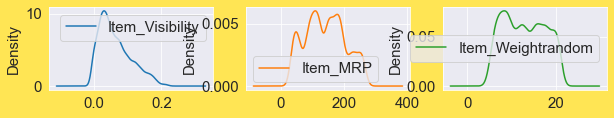

In [134]:
# checking the skewness of training data
plt.figure(figsize=(25,10))
sales_train_new[['Item_Visibility','Item_MRP','Item_Weightrandom']].plot(kind ='density',subplots = True, layout =(4,3),sharex = False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

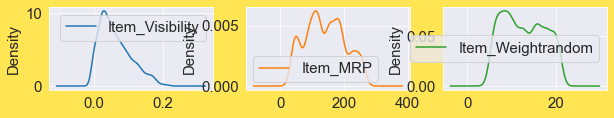

In [170]:
plt.figure(figsize=(25,10))
sales_test_new[['Item_Visibility','Item_MRP','Item_Weightrandom']].plot(kind ='density',subplots = True, layout =(4,3),sharex = False)

In [171]:
# removing Item_Visibility Skewness from train and test data
sales_train_new['Item_Visibility'] = np.sqrt(sales_train_new['Item_Visibility'])
sales_test_new['Item_Visibility'] = np.sqrt(sales_test_new['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

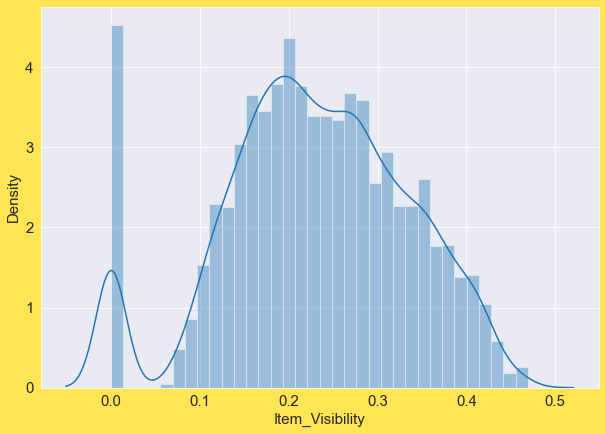

In [136]:
sns.distplot(sales_train_new['Item_Visibility'])
# We can see that skewness has became almost normal in traning data

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

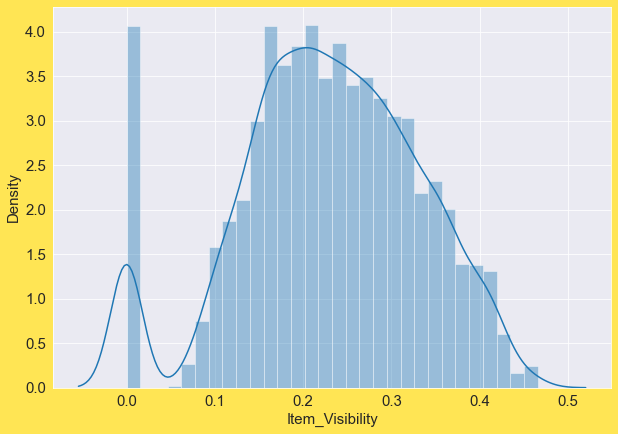

In [172]:
sns.distplot(sales_test_new['Item_Visibility'])
# We can see that skewness has became almost normal

In [137]:
sales_train_new.skew()[['Item_Visibility','Item_MRP','Item_Weightrandom']].sort_values()
# skewness has been reduced

Item_Visibility     -0.245750
Item_Weightrandom    0.088403
Item_MRP             0.128945
dtype: float64

In [138]:
# SPLITTING THE DATA
x = sales_train_new.drop(columns='Item_Outlet_Sales')
y = sales_train_new['Item_Outlet_Sales']

In [139]:
x.head()

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weightrandom  \
0         0.126678  249.8092                        4.0               9.30   
1         0.138846   48.2692                        8.0               5.92   
2         0.129461  141.6180                        4.0              17.50   
3         0.000000  182.0950                        3.0              19.20   
4         0.000000   53.8614                        1.0               8.93   

   Item_Identifier_FD  Item_Identifier_NC  Item_Fat_Content_Regular  \
0                   1                   0                         0   
1                   0                   0                         1   
2                   1                   0                         0   
3                   1                   0                         1   
4                   0                   1                         0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0                 0                    0                 0  ...   
1                 0                    0                 0  ...   
2                 0                    0                 0  ...   
3                 0                    0                 0  ...   
4                 0                    0                 0  ...   

   Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT049  Outlet_Location_Type_Tier 2  \
0                         1                            0   
1                         0                            0   
2                         1                            0   
3                         0                            0   
4                         0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            1                              0   
2                            0                              1   
3                            1                              0   
4                            1                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                              0                              0   
1                              1                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Outlet_Sizerandom_Medium  Outlet_Sizerandom_Small  
0                         1                        0  
1                         1                        0  
2                         1                        0  
3                         0                        0  
4                         0                        0  

[5 rows x 38 columns]

In [140]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [141]:
# Scaling the DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [173]:
# scaling the testing data as well
sales_test_new = sc.fit_transform(sales_test_new)

In [174]:
sales_test_new # scaled the test data as well

array([[-1.39322311, -0.53856326,  0.0644609 , ..., -0.35412135,
         1.07378679, -0.78704079],
       [-0.32425708, -0.87114917,  1.16389549, ..., -0.35412135,
        -0.93128357,  1.27058218],
       [ 0.84735181,  1.62917077, -0.3020173 , ..., -0.35412135,
        -0.93128357,  1.27058218],
       ...,
       [ 0.4121988 , -0.36238456,  0.43093909, ..., -0.35412135,
         1.07378679, -0.78704079],
       [-2.24577963,  1.18989781,  1.16389549, ..., -0.35412135,
         1.07378679, -0.78704079],
       [ 0.92625959, -0.99296112,  0.43093909, ..., -0.35412135,
        -0.93128357,  1.27058218]])

### Model Creation

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [143]:
# CHECKING THE RANDOM STATE FOR LINEAR REGRESSION
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')

At random state 76 The model performs very well
At random state:- 76
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 139 The model performs very well
At random state:- 139
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 150 The model performs very well
At random state:- 150
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 171 The model performs very well
At random state:- 171
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 178 The model performs very well
At random state:- 178
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 227 The model performs very well
At random state:- 227
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 283 The model performs very well
At random state:- 283
Training r2 score is  56.0
Testing r2 score is  56.0 


At random state 310 The model performs very well
At random state:- 310
Training r2 score is  56.0
Testing r2 scor

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

In [145]:
lr.fit(x_train,y_train)

LinearRegression()

In [146]:
pred_lr = lr.predict(x_test)

In [147]:
print('Accuracy Score:-',r2_score(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lr)))

Accuracy Score:- 0.5557607483601708
Mean Squared Error:- 1259030.9525659063
Mean Absolute Error:- 843.5703255141235
Root Mean Squared Error 1122.0654849722036


In [148]:
# Cross Validating linear regression
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [149]:
for i in range(4,10):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')

[0.56361942 0.52770993 0.57162171 0.55138336]
At cv:-  4
Cross validation score is:-  55.358360473449096
r2_score is:-  55.57607483601708


[0.56552194 0.54965798 0.5429857  0.5586194  0.55966838]
At cv:-  5
Cross validation score is:-  55.52906807143282
r2_score is:-  55.57607483601708


[0.56744914 0.54629514 0.53437233 0.56896045 0.56078296 0.55487202]
At cv:-  6
Cross validation score is:-  55.54553391296463
r2_score is:-  55.57607483601708


[0.56379389 0.55863646 0.54272113 0.55310145 0.56885945 0.55436926
 0.55146973]
At cv:-  7
Cross validation score is:-  55.613591095407166
r2_score is:-  55.57607483601708


[0.55810788 0.5711681  0.54164523 0.51728939 0.5622717  0.5619728
 0.55114948 0.55532289]
At cv:-  8
Cross validation score is:-  55.236593428675064
r2_score is:-  55.57607483601708


[0.55483564 0.57952336 0.53133494 0.5551583  0.55428328 0.55158887
 0.56178662 0.55509216 0.55851041]
At cv:-  9
Cross validation score is:-  55.57903967093898
r2_score is:-  55.5760748360170

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
dtr = DecisionTreeRegressor()

knr = KNeighborsRegressor()

svr = SVR()

sgdr = SGDRegressor()

rfr = RandomForestRegressor()

abr = AdaBoostRegressor()

gbr = GradientBoostingRegressor()

### KNN REGRESSOR

In [152]:
# KNN REGRESSOR
# KNeighbors
param_grid_knr = {'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree','kd_tree','brute'],'leaf_size':[25,30,35,40]}


In [153]:
knr_search = GridSearchCV(knr,param_grid=param_grid_knr)

In [155]:
knr_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [156]:
print(knr_search.best_score_)
print(knr_search.best_estimator_)
print(knr_search.best_params_)

0.44178037207645166
KNeighborsRegressor(algorithm='ball_tree', leaf_size=25, n_neighbors=10,
                    weights='distance')
{'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 10, 'weights': 'distance'}


In [157]:
knr = KNeighborsRegressor(algorithm='ball_tree',leaf_size=25,n_neighbors=10,weights='distance')# using the best parameters
knr.fit(x_train,y_train)
pred_knr_test= knr.predict(x_test)
pred_knr_train = knr.predict(x_train)
print('Training score of knr',r2_score(pred_knr_train,y_train))
print('Accuracy Score of knr',r2_score(pred_knr_test,y_test))
print('Mean Squared Error of knr',mean_squared_error(pred_knr_test,y_test))
print('Mean Absolute Error of knr',mean_absolute_error(pred_knr_test,y_test))
print('Root Mean Squared Error of knr',np.sqrt(mean_squared_error(pred_knr_test,y_test)))
print('\n')


Training score of knr 1.0
Accuracy Score of knr -0.31997134978900554
Mean Squared Error of knr 1581635.7489167303
Mean Absolute Error of knr 908.7214117287072
Root Mean Squared Error of knr 1257.6310066616243




### Gradient Boosting Regressor

In [158]:
GradientBoostingRegressor()
param_grid_gbr = {'loss':['squared_error','absolute_error','huber','quantile'],'n_estimators':[30,40,50,60,70,80],
                  'criterion':['friedman_mse','squared_error','mse'],'subsample':[0.5,1.0,1.5,2.0],'min_samples_split':[2,4,6]}

In [159]:
gbr_search = GridSearchCV(gbr,param_grid=param_grid_gbr)

In [160]:
gbr_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [30, 40, 50, 60, 70, 80],
                         'subsample': [0.5, 1.0, 1.5, 2.0]})

In [161]:
print(gbr_search.best_score_)
print(gbr_search.best_estimator_)
print(gbr_search.best_params_)

0.5874100656283436
GradientBoostingRegressor(n_estimators=60)
{'criterion': 'friedman_mse', 'loss': 'squared_error', 'min_samples_split': 2, 'n_estimators': 60, 'subsample': 1.0}


In [183]:
# using the best params
gbr = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',min_samples_split=2,n_estimators=60,subsample=1.0)
gbr.fit(x_train,y_train)
pred_gbr_test= gbr.predict(x_test)
pred_gbr_train = gbr.predict(x_train)
print('Training score of gbr',r2_score(pred_gbr_train,y_train))
print('Accuracy Score of gbr',r2_score(pred_gbr_test,y_test))
print('Mean Squared Error of gbr',mean_squared_error(pred_gbr_test,y_test))
print('Mean Absolute Error of gbr',mean_absolute_error(pred_gbr_test,y_test))
print('Root Mean Squared Error of gbr',np.sqrt(mean_squared_error(pred_gbr_test,y_test)))
print('\n')

Training score of gbr 0.31617062490483827
Accuracy Score of gbr 0.25101850012158144
Mean Squared Error of gbr 1151377.678365182
Mean Absolute Error of gbr 769.3135154187428
Root Mean Squared Error of gbr 1073.0226830618176




### AdaBoostRegresssor

In [175]:
param_grid_abr = {'loss':['linear', 'square', 'exponential'],'n_estimators':[30,40,50,60,70,80],'learning_rate':[0.5,1.0,1.5,2.0],'random_state':[30,40,46,52,67]}

In [176]:
abr_search = GridSearchCV(abr,param_grid=param_grid_abr)

In [178]:
abr_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 50, 60, 70, 80],
                         'random_state': [30, 40, 46, 52, 67]})

In [179]:
print(abr_search.best_score_)
print(abr_search.best_estimator_)
print(abr_search.best_params_)

0.4791720344452878
AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=30,
                  random_state=40)
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 30, 'random_state': 40}


In [181]:
# using the best params
abr = AdaBoostRegressor(learning_rate=0.5,loss='exponential',n_estimators=30,random_state=40)
abr.fit(x_train,y_train)
pred_abr_test= abr.predict(x_test)
pred_abr_train = abr.predict(x_train)
print('Training score of abr',r2_score(pred_abr_train,y_train))
print('Accuracy Score of abr',r2_score(pred_abr_test,y_test))
print('Mean Squared Error of abr',mean_squared_error(pred_abr_test,y_test))
print('Mean Absolute Error of abr',mean_absolute_error(pred_abr_test,y_test))
print('Root Mean Squared Error of abr',np.sqrt(mean_squared_error(pred_abr_test,y_test)))
print('\n')

Training score of abr -0.0951500930524527
Accuracy Score of abr -0.11915396750138951
Mean Squared Error of abr 1452253.488562857
Mean Absolute Error of abr 934.7956345754418
Root Mean Squared Error of abr 1205.0948048028656




### SUPPORT VECTOR REGRESSOR

In [203]:
param_grid_svr = {'kernel':['linear', 'poly', 'rbf'],
                  'degree':[4,5,6],'gamma':['scale','auto'],'coef0':[0.3,0.4,0.5],'shrinking':[True,False],'cache_size':[150,250,300]}

In [204]:
svr_search = GridSearchCV(svr,param_grid=param_grid_svr,cv=3)

In [205]:
svr_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'cache_size': [150, 250, 300],
                         'coef0': [0.3, 0.4, 0.5], 'degree': [4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'shrinking': [True, False]})

In [206]:
print(svr_search.best_score_)
print(svr_search.best_estimator_)
print(svr_search.best_params_)

0.4865941983931174
SVR(cache_size=150, coef0=0.3, degree=4, kernel='linear')
{'cache_size': 150, 'coef0': 0.3, 'degree': 4, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}


In [208]:
# using the best params
svr = SVR(cache_size=150,coef0=0.3,degree=4,gamma='scale',kernel='linear',shrinking=True)
svr.fit(x_train,y_train)
pred_svr_test= svr.predict(x_test)
pred_svr_train = svr.predict(x_train)
print('Training score of svr',r2_score(pred_svr_train,y_train))
print('Accuracy Score of svr',r2_score(pred_svr_test,y_test))
print('Mean Squared Error of svr',mean_squared_error(pred_svr_test,y_test))
print('Mean Absolute Error of svr',mean_absolute_error(pred_svr_test,y_test))
print('Root Mean Squared Error of svr',np.sqrt(mean_squared_error(pred_svr_test,y_test)))
print('\n')

Training score of svr -0.4823758609545443
Accuracy Score of svr -0.5214008282659461
Mean Squared Error of svr 1405316.7592695463
Mean Absolute Error of svr 854.2880645409449
Root Mean Squared Error of svr 1185.460568416152




### DecisionTreeRegressor

In [209]:
# creating parameter grid for dtr
param_grid_dtr = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
             'splitter':["best", "random"],'max_depth':[2,8,10,None],'max_features':[0.25,0.5,1.0],'min_samples_split':[0.25,0.5,1.0]}

In [210]:
dtr_search = GridSearchCV(dtr,param_grid=param_grid_dtr)

In [211]:
dtr_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0],
                         'splitter': ['best', 'random']})

In [212]:
print(dtr_search.best_score_)
print(dtr_search.best_estimator_)
print(dtr_search.best_params_)

0.5198027459123348
DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features=1.0,
                      min_samples_split=0.25)
{'criterion': 'poisson', 'max_depth': 10, 'max_features': 1.0, 'min_samples_split': 0.25, 'splitter': 'best'}


In [213]:
dtr = DecisionTreeRegressor(criterion='poisson',max_depth=10,max_features=1.0,min_samples_split=0.25,splitter='best') # using the best parameters
dtr.fit(x_train,y_train)
pred_dtr_test= dtr.predict(x_test)
pred_dtr_train = dtr.predict(x_train)
print('Training score of dtr',r2_score(pred_dtr_train,y_train))
print('Accuracy Score of dtr',r2_score(pred_dtr_test,y_test))
print('Mean Squared Error of dtr',mean_squared_error(pred_dtr_test,y_test))
print('Mean Absolute Error of dtr',mean_absolute_error(pred_dtr_test,y_test))
print('Root Mean Squared Error of dtr',np.sqrt(mean_squared_error(pred_dtr_test,y_test)))
print('\n')


Training score of dtr 0.09038986822543216
Accuracy Score of dtr 0.04202550185261389
Mean Squared Error of dtr 1414223.1448323447
Mean Absolute Error of dtr 869.4470485346425
Root Mean Squared Error of dtr 1189.2111439237124




Text(0.5, 1.0, 'Linear Regression')

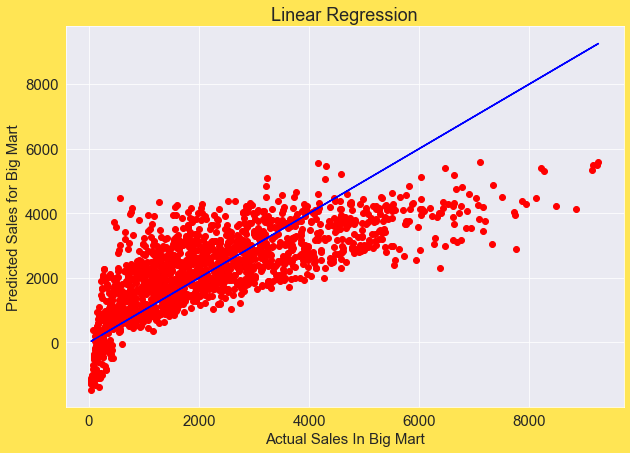

In [216]:
# choosing linear regression as best model with 55% accuracy
plt.scatter(x=y_test,y=pred_lr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales In Big Mart')
plt.ylabel('Predicted Sales for Big Mart')
plt.title('Linear Regression')

### Saving the model

In [218]:
import pickle
filename = 'bigmartsales.pkl'
pickle.dump(lr,open(filename, 'wb'))

### Predicting with the test data

In [222]:
prediction=lr.predict(sales_test)

In [223]:
prediction

array([-1.59847275e+15, -2.33460181e+15, -8.46841518e+14, ...,
       -1.49938292e+15, -2.33460181e+15, -1.80006025e+15])

### Saving the predictions

In [224]:
predicted_sales = pd.DataFrame(prediction)

In [225]:
predicted_sales.to_csv('prediction_test_data_csv.csv')